In [1]:
! python -m venv .PI_venv #Crear entorno virtual
! .PI_venv\Scripts\activate 
! pip install pandas numpy
! pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np

In [3]:
archivo_original = "data_latinoamerica.csv" #variable string que contiene el nombre del archivo
temperatura_original = pd.read_csv(archivo_original) #carga del archivo

In [4]:
temperatura_original.info() #informacion general del data set cargado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [5]:
temperatura_original.head() #ver encabezados del data set

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [6]:
# Solicitan solo trabajar con los datos de Argentina, Chile, Colombia, Mexico, Peru,Brazil
paises_usar = ["Argentina", "Chile", "Colombia","Mexico","Peru","Brazil"] #lista contiene los países de interés: Argentina, Chile, Colombia, México, Perú y Brasil.

data_latam = temperatura_original[temperatura_original["country_name"].isin(paises_usar)] #metodo de las series
#isin() de pandas para seleccionar solo las filas donde la columna "country_name" coincide con alguno de los países en la lista. 
#Se guarda ese subconjunto en data_latam

np.shape(data_latam)#funcion de numpy para ver la cantidad de filas y columnas luego de filtrar

(11970289, 50)

In [7]:
data_latam.isnull().sum() # obtener un resumen del número de valores nulos (faltantes) por cada columna en el DataFrame. Para identificar que se puede eliminar


location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [8]:
#con el codigo anterior se puede identificar que location_key no tiene faltantes por eso se usara para limpiar mas aun el data set
data_latam_location = data_latam[data_latam["location_key"].isin(["AR","CL","CO","MX","PE","BR"])] #se usa nuevamente el metodo isin para filtrar y quedarse con las filas que no tienen nulos


In [9]:
np.shape(data_latam_location)

(5946, 50)

In [10]:
data_latam_location_fecha = data_latam_location[data_latam_location["date"]>"2021-01-01"] #filtrando nos traemos los registros mayores al 01/01/2021 en un nuevo dataset

In [11]:
data_latam_location_fecha.shape #se valida la cantidad de filas y columnas con el metodo shape y no con la funcion

(3744, 50)

In [12]:
# Identificar y contar los valores nulos en el DataFrame, seleccionando únicamente las columnas con al menos un valor nulo.

# 1. data_latam_location_fecha.isnull(): Devuelve un DataFrame con valores True para los nulos y False para los no nulos.
# 2. .sum(): Cuenta los valores True (nulos) por columna.
# 3. [data_latam_location_fecha.isnull().sum() > 0]: Filtra las columnas donde el número de valores nulos es mayor a 0.
valores_nulos = data_latam_location_fecha.isnull().sum()[data_latam_location_fecha.isnull().sum()>0]
valores_nulos #mostramos la serie de pandas para saber que columnas tienen valores nulos

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [13]:
for pais in paises_usar:
    data_latam_location_fecha["new_confirmed"] = data_latam_location_fecha["new_confirmed"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["new_confirmed"].mean())
    data_latam_location_fecha["new_deceased"] = data_latam_location_fecha["new_deceased"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["new_deceased"].mean())
    
    data_latam_location_fecha["cumulative_confirmed"] = data_latam_location_fecha["cumulative_confirmed"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["cumulative_confirmed"].mean())
    data_latam_location_fecha["cumulative_deceased"] = data_latam_location_fecha["cumulative_deceased"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["cumulative_deceased"].mean())
    
    
    
    data_latam_location_fecha["rainfall_mm"] = data_latam_location_fecha["rainfall_mm"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["rainfall_mm"].mean())
    data_latam_location_fecha["relative_humidity"] = data_latam_location_fecha["relative_humidity"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["relative_humidity"].mean())
    data_latam_location_fecha["average_temperature_celsius"] = data_latam_location_fecha["average_temperature_celsius"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["average_temperature_celsius"].mean())
    data_latam_location_fecha["minimum_temperature_celsius"] = data_latam_location_fecha["minimum_temperature_celsius"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["minimum_temperature_celsius"].mean())
    data_latam_location_fecha["maximum_temperature_celsius"] = data_latam_location_fecha["maximum_temperature_celsius"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["maximum_temperature_celsius"].mean())
    
#rellenar columnas nulas con 0
data_latam_location_fecha["new_recovered"] = data_latam_location_fecha["new_recovered"].fillna(0) # llenará todos los valores nulos en la columna "new_recovered" con 0.
#Esto puede ser útil para tratar los casos no reportados de nuevos recuperados como si no hubiera recuperaciones en esos días.

#data_latam_location_fecha["cumulative_recovered"] = data_latam_location_fecha["cumulative_recovered"].fillna(0) #rellena con 0 los graficos no se ven muy acordes
#data_latam_location_fecha["cumulative_vaccine_doses_administered"] = data_latam_location_fecha["cumulative_vaccine_doses_administered"].fillna(0)
#rellenamos con el valor siguiente
#data_latam_location_fecha["cumulative_vaccine_doses_administered"] = data_latam_location_fecha["cumulative_vaccine_doses_administered"].fillna(method="ffill")

# convierto a tipo fecha para poder modificar al inicio en 0 y no afectar todos los datos ##########*****############
data_latam_location_fecha["date"] = pd.to_datetime(data_latam_location_fecha["date"])
# Paso 1: Fijar los valores de enero de 2021 en 0

data_latam_location_fecha.loc[data_latam_location_fecha["date"].dt.strftime('%Y-%m') == '2021-01', "cumulative_vaccine_doses_administered"] = 0


# Paso 2: Rellenar los valores nulos restantes con el valor más cercano (forward y backward fill)
data_latam_location_fecha["cumulative_vaccine_doses_administered"] = data_latam_location_fecha["cumulative_vaccine_doses_administered"].fillna(method="ffill").fillna(method="bfill")



#Reemplaza todos los ceros en la columna cumulative_recovered con valores nulos (NaN).
data_latam_location_fecha['cumulative_recovered'] = data_latam_location_fecha['cumulative_recovered'].replace(0, pd.NA)

#Luego, utiliza el método bfill() para rellenar esos valores nulos con el siguiente valor no nulo que se encuentre en la columna.
data_latam_location_fecha['cumulative_recovered'] = data_latam_location_fecha['cumulative_recovered'].fillna(method='bfill')
data_latam_location_fecha['cumulative_recovered'] = data_latam_location_fecha['cumulative_recovered'].fillna(method="ffill").fillna(method="bfill")



C:\Users\ERBC\AppData\Local\Temp\ipykernel_7140\668914233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_location_fecha["new_confirmed"] = data_latam_location_fecha["new_confirmed"].fillna(data_latam_location_fecha[data_latam_location_fecha["country_name"]==pais]["new_confirmed"].mean())
C:\Users\ERBC\AppData\Local\Temp\ipykernel_7140\668914233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_location_fecha["new_deceased"] = data_latam_location_fecha["new_deceased"].fillna(data

In [14]:
#***#

In [15]:
data_latam_location_fecha.shape #se valida la cantidad de filas y columnas con el metodo shape y no con la funcion
data_latam_location_fecha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64

In [16]:
print(data_latam_location_fecha.isnull().sum()[data_latam_location_fecha.isnull().sum()>0])
print(np.shape(data_latam_location_fecha))

Series([], dtype: int64)
(3744, 50)


In [17]:
#guardamos el data frame como csv
data_latam_location_fecha.to_csv("dataset_filtrado_limpio.csv",index=False)

In [18]:
dataset_latam_listo = pd.read_csv("dataset_filtrado_limpio.csv", sep=",")
#dataset_latam_listo.head()
#dataset_latam_listo.info()
print(np.shape(dataset_latam_listo))

(3744, 50)


In [19]:

import pandas as pd
import numpy as np

In [20]:
dataset_latam = "dataset_filtrado_limpio.csv"
data_latam = pd.read_csv(dataset_latam) #variable string que contiene el nombre del archivo
data_latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [21]:
#Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

numeric_columns = data_latam.select_dtypes(include='number').columns #para seleccionar solo las columnas numéricas del DataFrame. Funciona para int y float

# Diccionario para guardar las estadísticas
stats_dict = {} #diccionario donde cada columna numérica será una clave, y sus valores serán otro diccionario con las estadísticas descriptivas.

# Usamos un bucle 'for' para recorrer cada columna y calcular estadísticas
for column in numeric_columns:
    stats_dict[column] = {
        'mean': data_latam[column].mean(), #promedio
        'median': data_latam[column].median(), #mediana
        'std_dev': data_latam[column].std(), #desviacion estandard
        'min': data_latam[column].min(), #valor minimo
        'max': data_latam[column].max(), #valor maximo
        'null_count': data_latam[column].isnull().sum(), #conteo de nulos
        'non_null_count': data_latam[column].notnull().sum() #conteo de no nulos
    }

# Mostrar las estadísticas calculadas
for column, stats in stats_dict.items():
    print(f"Estadísticas para la columna '{column}':")
    for stat_name, stat_value in stats.items():
        # Solo redondeamos si el valor es numérico (float o int)
        if isinstance(stat_value, (float, int)):
            print(f"  {stat_name}: {round(stat_value, 2)}")
        else:
            print(f"  {stat_name}: {stat_value}")
    print("\n")

Estadísticas para la columna 'new_confirmed':
  mean: 13930.53
  median: 5227.0
  std_dev: 24205.55
  min: -573.0
  max: 298408.0
  null_count: 0
  non_null_count: 3744


Estadísticas para la columna 'new_deceased':
  mean: 276.36
  median: 101.0
  std_dev: 507.13
  min: 0.0
  max: 11447.0
  null_count: 0
  non_null_count: 3744


Estadísticas para la columna 'cumulative_confirmed':
  mean: 6780428.9
  median: 3648782.0
  std_dev: 7977326.65
  min: 971.0
  max: 34568833.0
  null_count: 0
  non_null_count: 3744


Estadísticas para la columna 'cumulative_deceased':
  mean: 192646.44
  median: 139496.5
  std_dev: 182624.94
  min: 1.0
  max: 685203.0
  null_count: 0
  non_null_count: 3744


Estadísticas para la columna 'cumulative_vaccine_doses_administered':
  mean: 80819940.5
  median: 47784908.0
  std_dev: 93555696.12
  min: 0.0
  max: 347868481.0
  null_count: 0
  non_null_count: 3744


Estadísticas para la columna 'population':
  mean: 77721474.17
  median: 47910798.0
  std_dev: 671377

In [22]:
# Convertir el diccionario stats_dict en un DataFrame
df_stats = pd.DataFrame(stats_dict)  # Usamos .T para transponer el DataFrame para invertir filas y columnas lo he dejado sin el .t

# Redondeamos a dos decimales
df_stats = df_stats.round(2)

# Mostramos el DataFrame con las estadísticas
print(df_stats)

                new_confirmed  new_deceased  cumulative_confirmed  \
mean                 13930.53        276.36            6780428.90   
median                5227.00        101.00            3648782.00   
std_dev              24205.55        507.13            7977326.65   
min                   -573.00          0.00                971.00   
max                 298408.00      11447.00           34568833.00   
null_count               0.00          0.00                  0.00   
non_null_count        3744.00       3744.00               3744.00   

                cumulative_deceased  cumulative_vaccine_doses_administered  \
mean                      192646.44                           8.081994e+07   
median                    139496.50                           4.778491e+07   
std_dev                   182624.94                           9.355570e+07   
min                            1.00                           0.000000e+00   
max                       685203.00                      

In [23]:
def calcular_mediana_varianza_rango(df, columnas):
    """
    Calcula la mediana, varianza y rango para las columnas especificadas de un DataFrame.

    :param df: El DataFrame que contiene los datos.
    :param columnas: Una lista de columnas a las que se les aplicará el cálculo.
    :return: Un DataFrame con la mediana, varianza y rango de las columnas seleccionadas.
    """
    estadisticas = {}
    
    for columna in columnas:
        mediana = df[columna].median()
        varianza = df[columna].var()
        rango = df[columna].max() - df[columna].min()
        
        estadisticas[columna] = {
            'Mediana': mediana,
            'Varianza': varianza,
            'Rango': rango
        }
    
    return pd.DataFrame(estadisticas).T

# Ejemplo de uso
columnas_a_calcular = ["new_confirmed", "new_deceased", "rainfall_mm","adult_male_mortality_rate"]
resultados = calcular_mediana_varianza_rango(data_latam, columnas_a_calcular)

# Mostrar el DataFrame con los resultados
print(resultados)

                            Mediana      Varianza       Rango
new_confirmed              5227.000  5.859087e+08  298981.000
new_deceased                101.000  2.571841e+05   11447.000
rainfall_mm                   0.000  1.842755e+01      46.736
adult_male_mortality_rate   149.351  7.290079e+02      80.859


In [24]:
###EXTRA###
##funcion para calcular por pais usando group by##
def calcular_estadisticas_por_pais(df, columnas, grupo="country_name"):
    """
    Calcula la mediana, varianza y rango por país para las columnas especificadas de un DataFrame.

    :param df: El DataFrame que contiene los datos.
    :param columnas: Una lista de columnas a las que se les aplicará el cálculo.
    :param grupo: La columna que se usará para agrupar (por defecto, 'country_name').
    :return: Un DataFrame con la mediana, varianza y rango de las columnas seleccionadas, agrupado por país.
    """
    estadisticas = {}
    
    for columna in columnas:
        # Agrupar por país y calcular estadísticas
        mediana = df.groupby(grupo)[columna].median()
        varianza = df.groupby(grupo)[columna].var()
        rango = df.groupby(grupo)[columna].max() - df.groupby(grupo)[columna].min()
        
        # Guardar las estadísticas en un diccionario
        estadisticas[columna] = {
            'Mediana': mediana,
            'Varianza': varianza,
            'Rango': rango
        }
    
    # Convertir el diccionario en un DataFrame
    estadisticas_df = pd.DataFrame(estadisticas).T
    return estadisticas_df

# Ejemplo de uso
columnas_a_calcular = ["new_confirmed", "new_deceased", "rainfall_mm"]
resultados_por_pais = calcular_estadisticas_por_pais(data_latam, columnas_a_calcular)

# Mostrar el DataFrame con los resultados
print(resultados_por_pais)

                                                         Mediana  \
new_confirmed  country_name
Argentina     5223.5
Brazil      ...   
new_deceased   country_name
Argentina     64.0
Brazil       3...   
rainfall_mm    country_name
Argentina    0.0
Brazil       0.0...   

                                                        Varianza  \
new_confirmed  country_name
Argentina    5.533830e+08
Brazil ...   
new_deceased   country_name
Argentina     27559.075325
Brazil...   
rainfall_mm    country_name
Argentina    24.064582
Brazil    ...   

                                                           Rango  
new_confirmed  country_name
Argentina    174174.0
Brazil     ...  
new_deceased   country_name
Argentina      656.0
Brazil      ...  
rainfall_mm    country_name
Argentina    38.749111
Brazil    ...  


In [25]:
###EXTRA###
##funcion para calcular por pais, pero pasando el parametro de pais##

def calcular_estadisticas_por_pais_especifico(df, pais, columnas):
    """
    Calcula la mediana, varianza y rango para un país específico en las columnas seleccionadas de un DataFrame.

    :param df: El DataFrame que contiene los datos.
    :param pais: El país para el que se calcularán las estadísticas.
    :param columnas: Una lista de columnas a las que se les aplicará el cálculo.
    :return: Un DataFrame con la mediana, varianza y rango de las columnas seleccionadas para el país especificado.
    """
    # Filtrar el DataFrame para el país específico
    df_pais = df[df["country_name"] == pais]
    
    # Inicializar un diccionario para almacenar las estadísticas
    estadisticas = {}
    
    for columna in columnas:
        # Calcular las estadísticas
        mediana = df_pais[columna].median()
        varianza = df_pais[columna].var()
        rango = df_pais[columna].max() - df_pais[columna].min()
        
        # Guardar las estadísticas en el diccionario
        estadisticas[columna] = {
            'Mediana': mediana,
            'Varianza': varianza,
            'Rango': rango
        }
    
    # Convertir el diccionario en un DataFrame
    estadisticas_df = pd.DataFrame(estadisticas).T
    return estadisticas_df

# Ejemplo de uso
pais_seleccionado = "Peru"  # Cambia este valor para analizar otro país
columnas_a_calcular = ["new_confirmed", "new_deceased", "rainfall_mm"]
resultados_pais = calcular_estadisticas_por_pais_especifico(data_latam, pais_seleccionado, columnas_a_calcular)

# Mostrar el DataFrame con los resultados
print(f"Estadísticas para {pais_seleccionado}:")
print(resultados_pais)

Estadísticas para Peru:
               Mediana      Varianza      Rango
new_confirmed   2249.5  6.436550e+07  58128.000
new_deceased      51.0  6.451492e+04    847.000
rainfall_mm        0.0  4.139302e+01     46.736


# Avance 2

In [26]:
! python -m venv .PI_venv #Crear entorno virtual

In [27]:
#activar entorno
! .PI_venv\Scripts\activate 

In [28]:
#Configura VS Code para reconocer el entorno virtual: 
#Abre la paleta de comandos con Ctrl + Shift + P y selecciona Python: Select Interpreter.
#Elige el intérprete de Python de tu entorno virtual (debería mostrar la ruta del entorno virtual que has creado).
! where python 
#comprobar si esta usando el entorno virtual

c:\Users\ERBC\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\ERBC\AppData\Local\Microsoft\WindowsApps\python.exe


In [29]:
! pip install pandas seaborn 
#instala numpy, pandas, matplolit y seaborn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.0 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 20.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 36.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 25.9 MB/s eta 0:00:00


In [30]:
! pip freeze > requirements.txt #crea txt con los requerimientos

In [31]:
import matplotlib.pyplot as plt #importo solo el componente pyplot  y no toda la libreria
import seaborn as sns
import numpy as np
import pandas as pd

In [32]:
data_latinoamerica_paises = pd.read_csv("dataset_filtrado_limpio.csv", sep=",", encoding='utf-8') #cargo el csv a un data frame de pandas

In [33]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [34]:
for i in data_latinoamerica_paises.columns: #recorremos cada columna del data drame y calculamos con describe las estadisticas basicas segun el tipo de dato de la columna
    print(i)
    print(data_latinoamerica_paises[i].describe().round(2)) #con round lo redondeo a dos decimales
    print("-----------------------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------------
new_confirmed
count      3744.00
mean      13930.53
std       24205.55
min        -573.00
25%        1536.75
50%        5227.00
75%       14812.75
max      298408.00
Name: new_confirmed, dtype: float64
-----------------------------------------
new_deceased
count     3744.00
mean       276.36
std        507.13
min          0.00
25%         26.00
50%        101.00
75%        

In [35]:
#para poder analizar a lo largo del tiempo debemos usar la columna de fechas como indice
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"]) #se castea para que cambie de tipo objeto a timo date time
data_latinoamerica_paises.set_index("date", inplace=True) #seteamos la columna como indice, el inplace evita tener que pisar el objeto y se modifica asi mismo directamente
data_latinoamerica_paises.head() #ver las primeras filas del data frame y se observa que la columna fecha esta de 1era y es el indice


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0             6756284.0  
2021-01-03                        15.8            0.0             6756284.0  
2021-01-04                        15.8            0.0             6756284.0  
2021-01-05                        15.8            0.0             6756284.0  
2021-01-06                        15.8            0.0             6756284.0  

[5 rows x 49 columns]

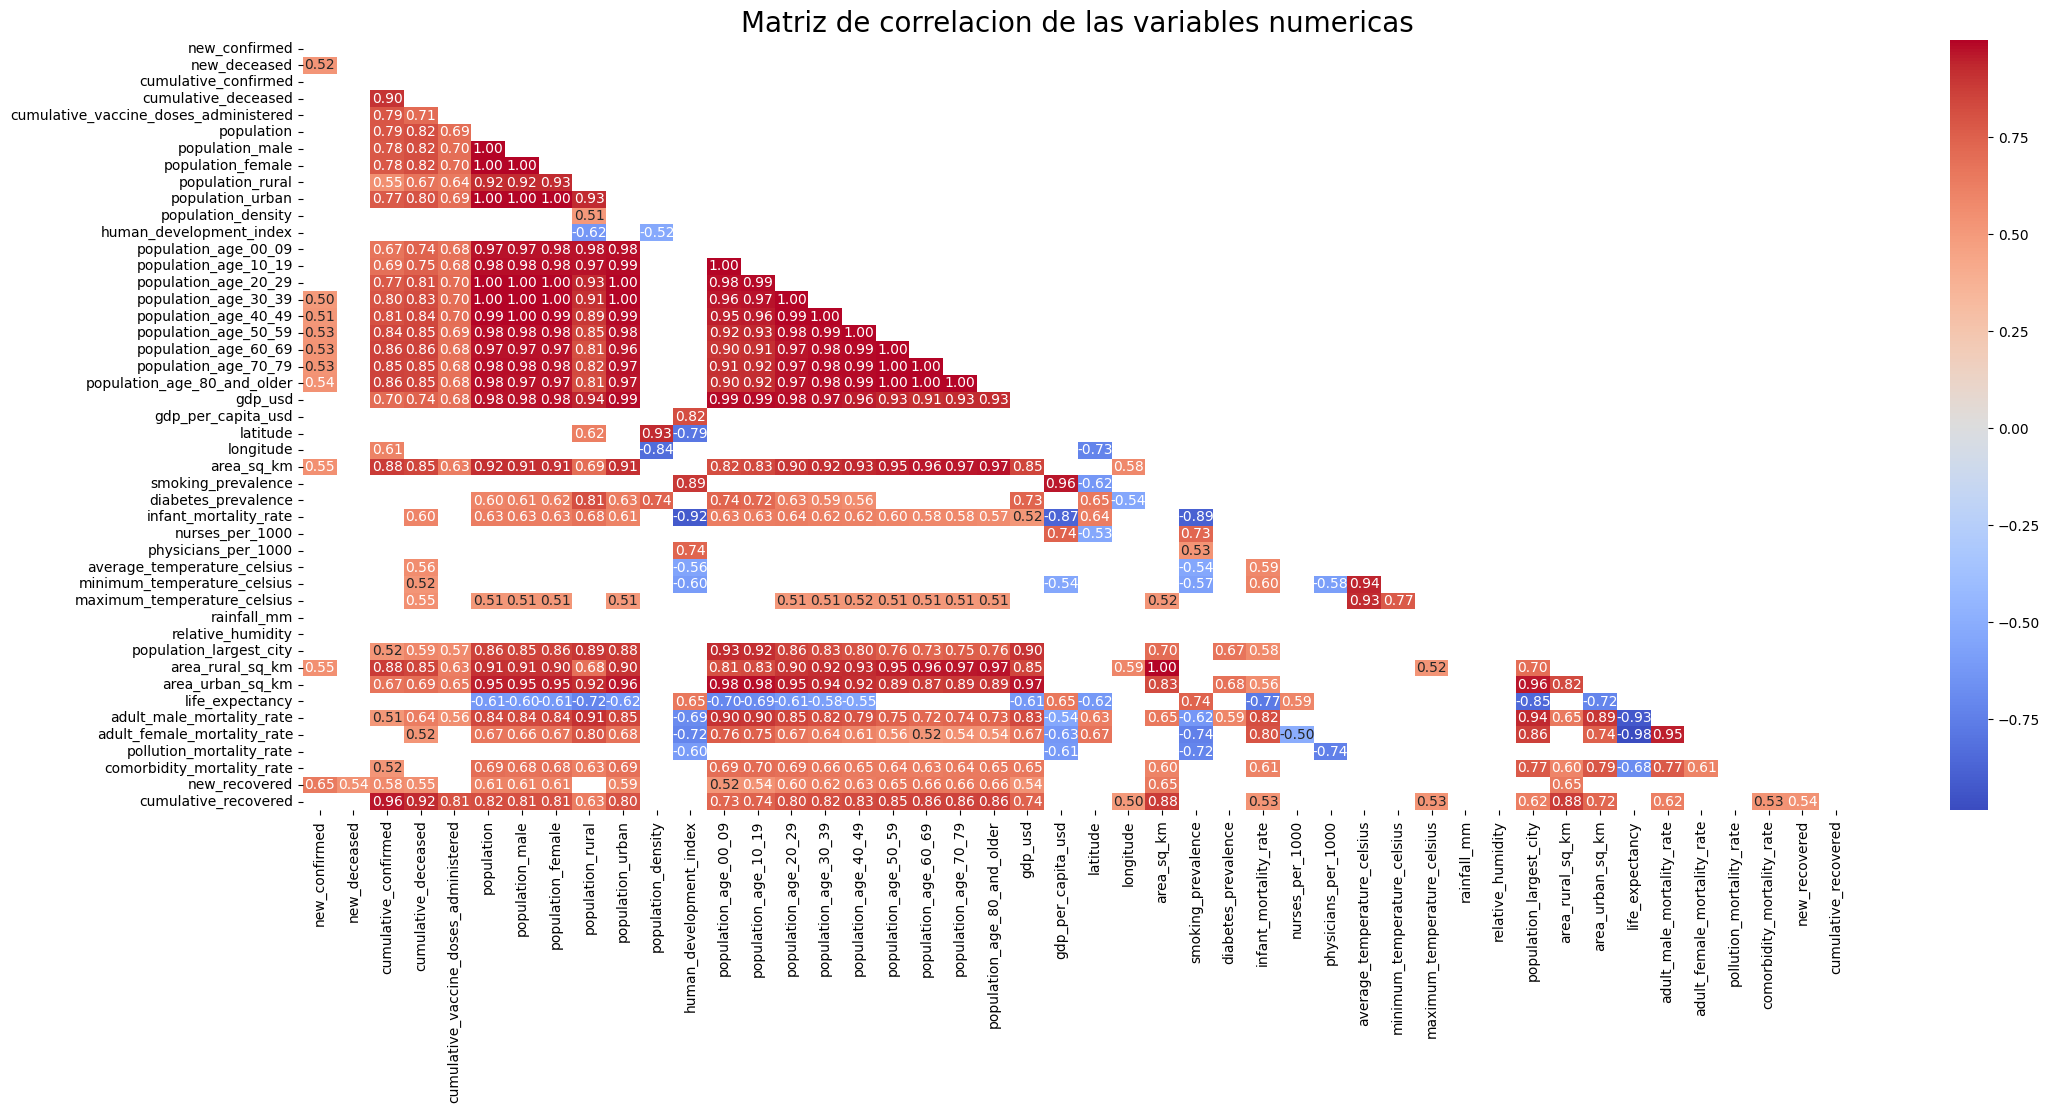

In [36]:
#crear matriz de correlacion de las variable numericas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=["float64","int64"]).columns #selecciono las columnas numericas para asignaras a otro df que se usa como mascara de filtro

correlation_matrix = data_latinoamerica_paises[numeric_columns].corr() #se calcula la matrix de correlacion para las columnas seleccionadas. Esta función evalúa la relación lineal entre pares de variables
#y devuelve un DataFrame donde cada celda representa el coeficiente de correlación de Pearson entre dos variables.
#1 significa una correlación positiva perfecta. -1 significa una correlación negativa perfecta. 0 indica que no hay correlación lineal.

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) #crea una máscara que permite ocultar o enmascarar el triángulo superior de una matriz, 
#en este caso la matriz de correlación. np.ones_like crea una nueva matriz del mismo tamaño que correlation_matrix, donde todos los valores son 1 (True) o 0 (False), según el tipo especificado.
#indica que todos los valores de esta matriz deben ser booleanos (True o False).
#np.triu devuelve la parte triangular superior de la matriz, convirtiendo los valores del triángulo inferior en False.
#Así, la máscara tiene True en el triángulo superior (incluyendo la diagonal) y False en el inferior.
#Al usar esta máscara en una visualización (como un heatmap), se mostrará únicamente el triángulo inferior de la matriz de correlación, 
# #ya que el superior es redundante (las correlaciones son simétricas). Esto mejora la legibilidad del gráfico.

correlation_matrix= correlation_matrix[abs(correlation_matrix)> abs(0.5)] #modifica la matriz de correlación para mostrar únicamente los valores cuya magnitud de correlación sea mayor que 0.5

#crear grafico
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")

#sns.heatmap(...) Genera el heatmap o mapa de calor, un gráfico de matriz de colores que representa los valores de correlación entre las variables numéricas.
#mask=mask: La máscara creada anteriormente oculta el triángulo superior de la matriz de correlación (y su diagonal). 
# Esto hace que el gráfico sea más claro, ya que las correlaciones son simétricas, y evita valores duplicados.
#annot=True: Añade los valores de correlación sobre cada celda del heatmap, permitiendo ver cada coeficiente sin necesidad de interpretar los colores.
# cmap="coolwarm": Define la paleta de colores utilizada. "coolwarm" representa las correlaciones altas (positivas) en tonos rojos y las bajas (negativas) en tonos azules, 
# lo que permite visualizar rápidamente la intensidad y dirección de las relaciones.
# fmt=".2f": Formatea los valores numéricos a dos decimales para mayor claridad.

plt.title("Matriz de correlacion de las variables numericas", fontsize=20)
plt.show()



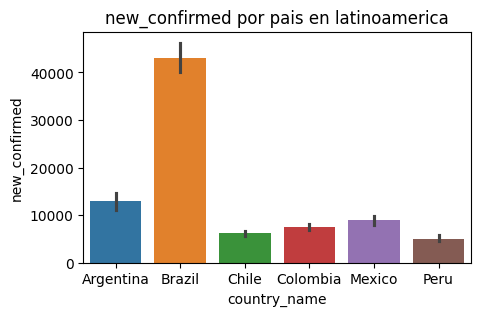

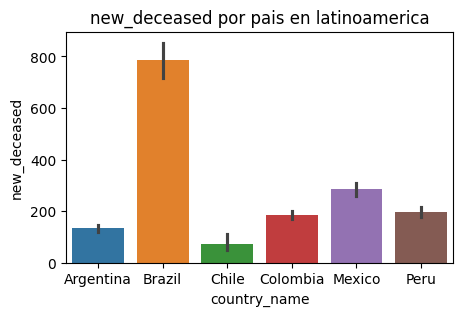

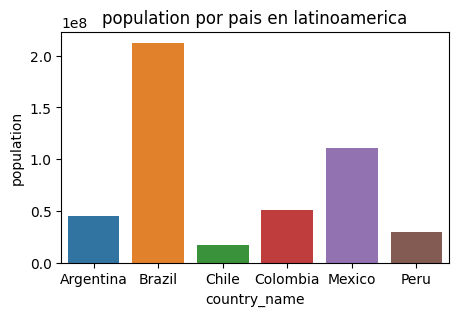

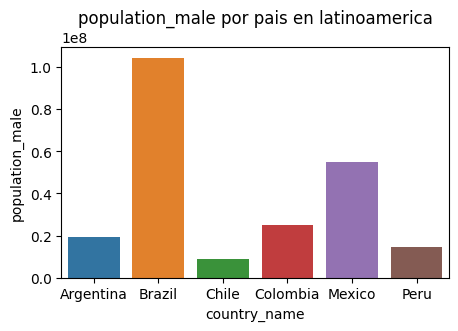

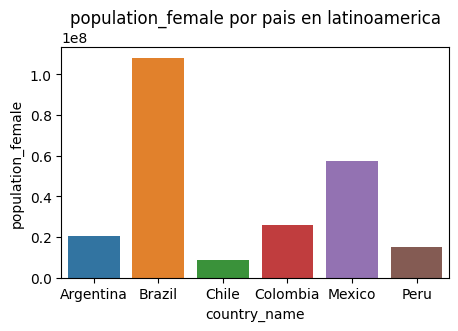

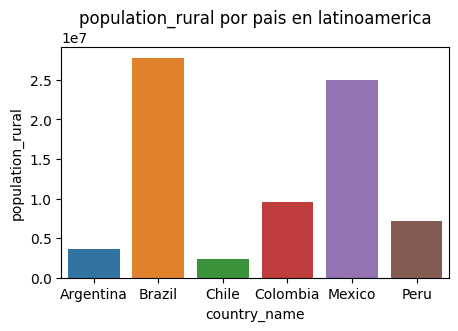

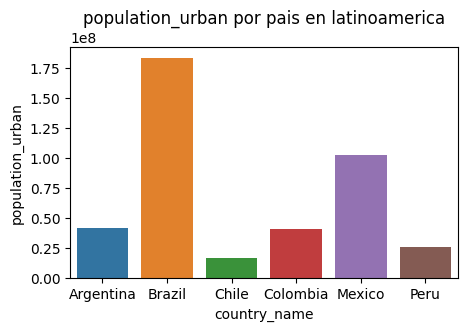

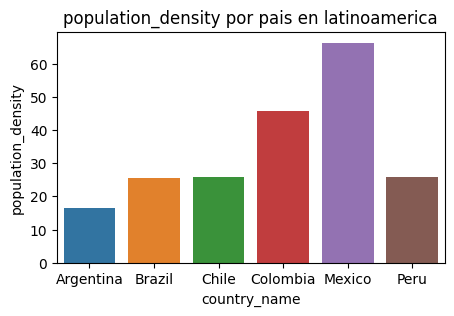

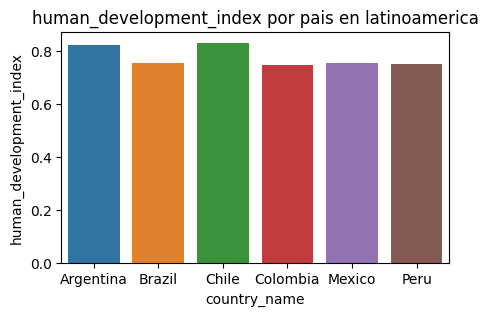

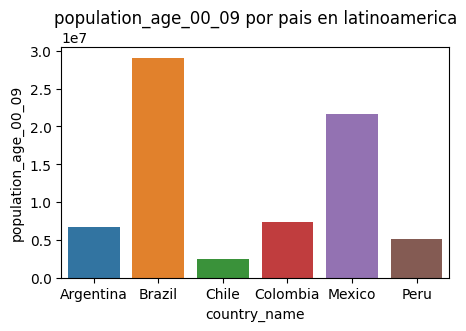

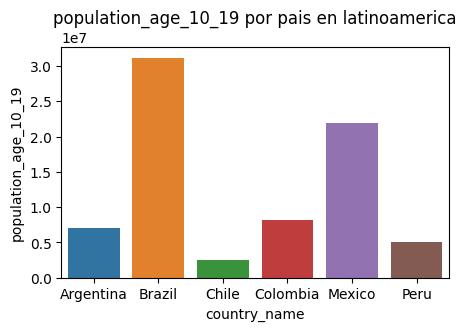

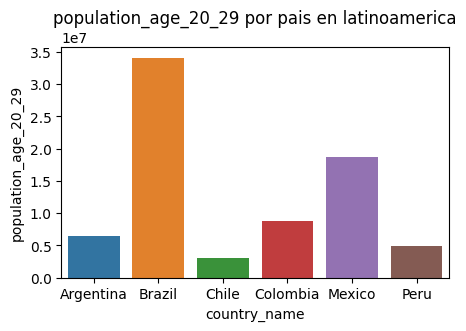

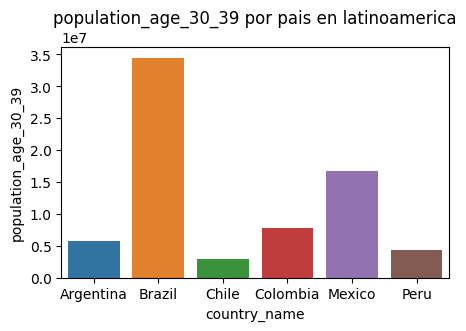

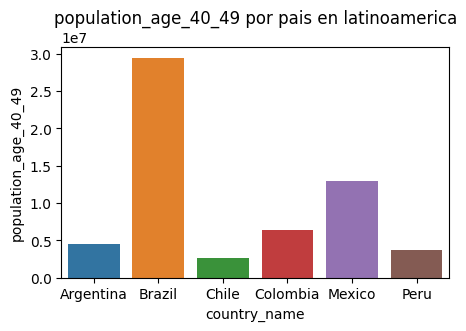

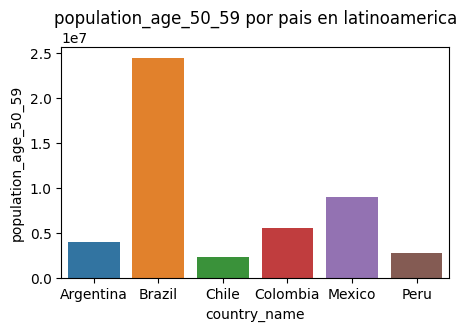

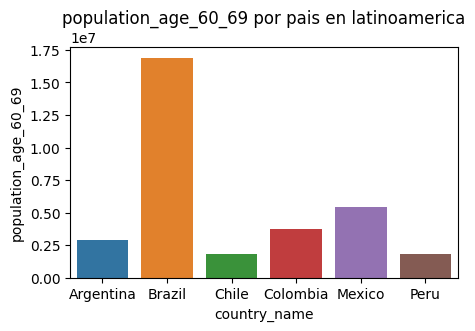

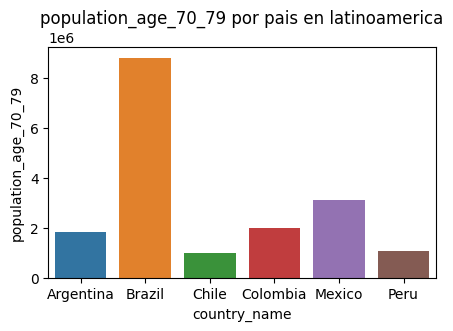

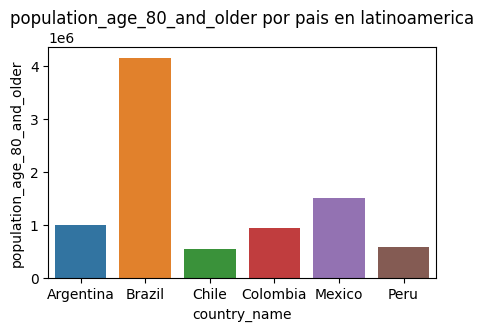

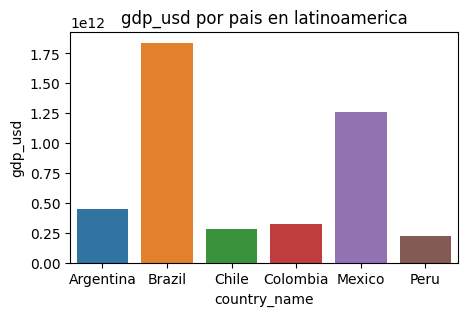

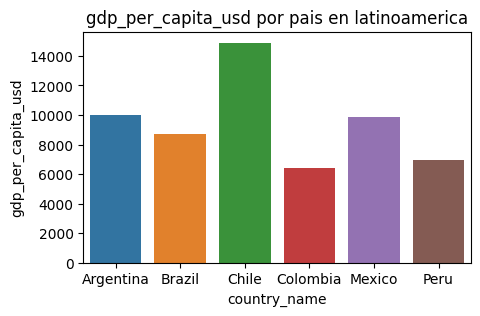

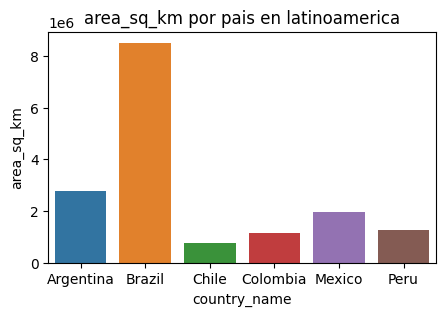

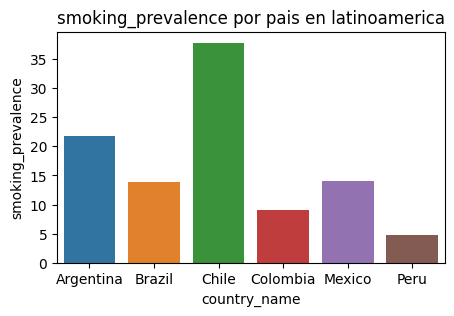

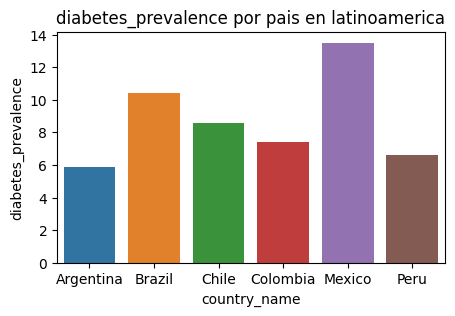

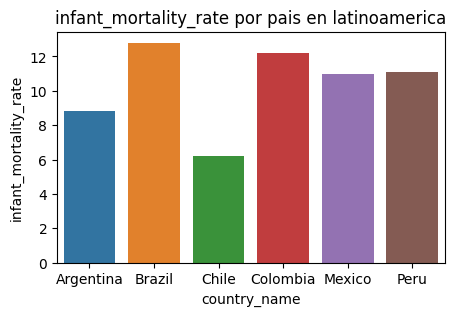

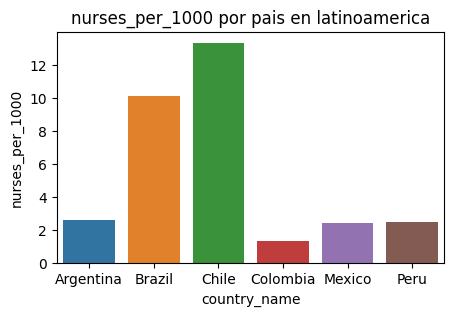

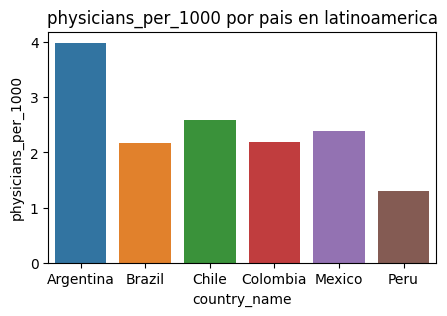

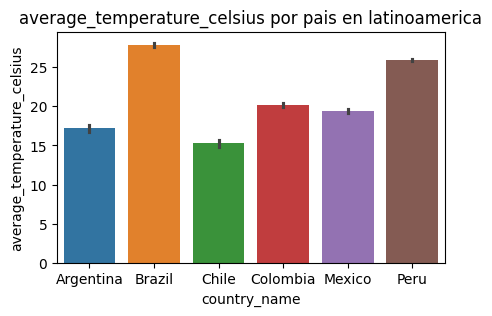

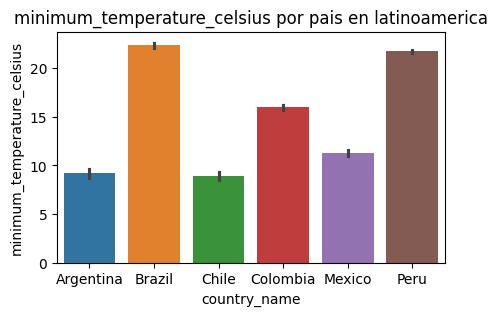

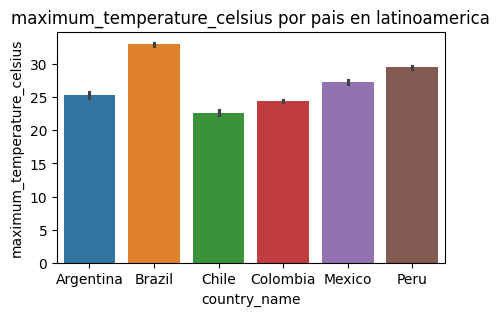

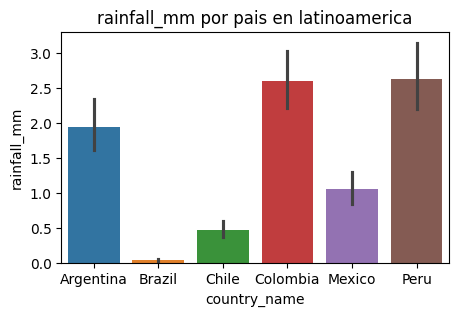

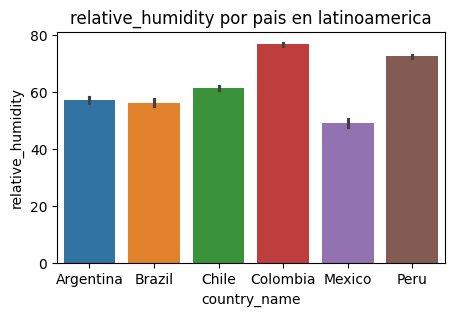

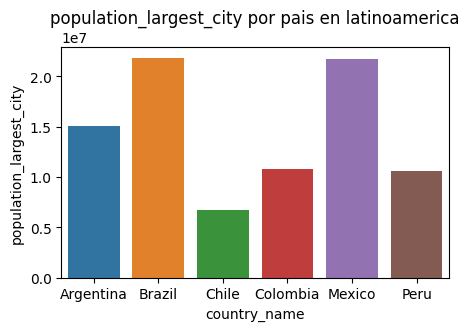

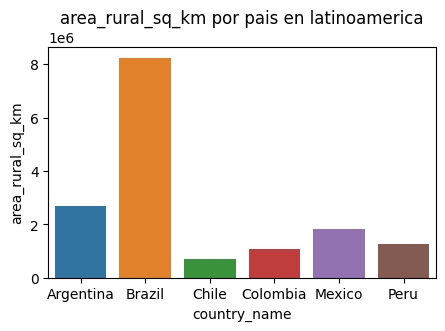

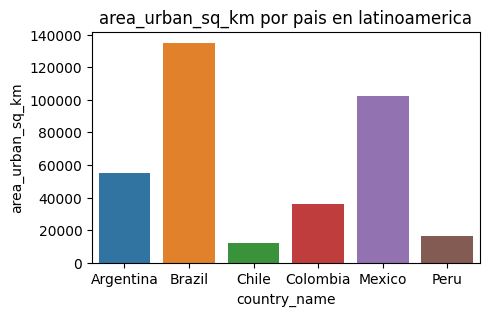

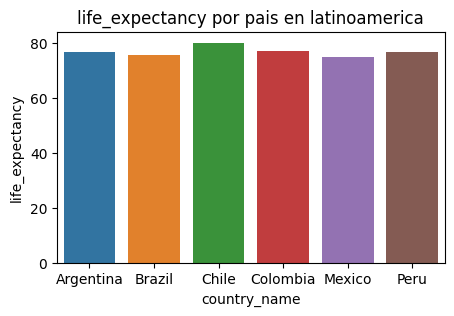

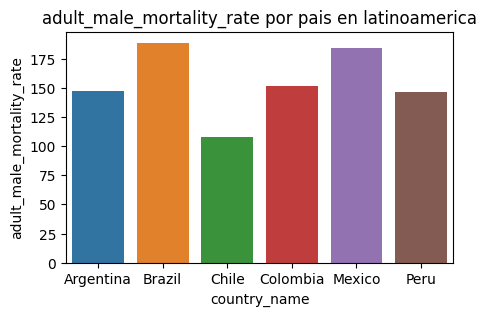

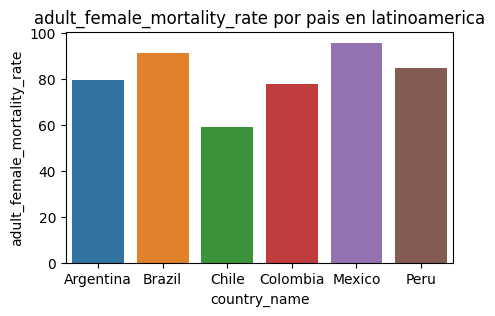

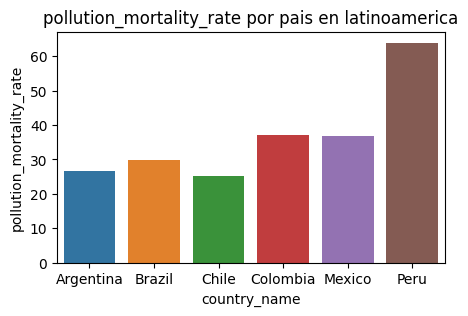

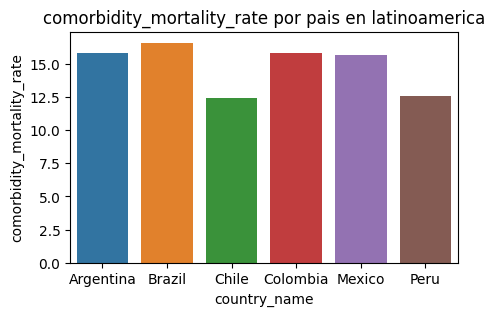

In [37]:
# revision grafica de la mayoria de las columnas para enternder el comportamiento de los datos, usando barplots con for y la libreria seaborn
#crea un gráfico de barras para cada una de las columnas numéricas del DataFrame,  excepto las columnas que se especifican en la lista de exclusión.
#

for i in data_latinoamerica_paises.columns: #nicia un bucle que itera sobre cada nombre de columna en data_latinoamerica_paises
    if i not in ["location_key", "date", "country_name", "country_code", "latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", 
                 "cumulative_recovered", "cumulative_vaccine_doses_administered", "new_recovered"]:
        
        fig, ax= plt.subplots(figsize=(5, 3)) #Crea una figura (fig) y un eje (ax) para el gráfico, con un tamaño de 5x3 pulgadas. Esto proporciona un área de trabajo para el gráfico.

        sns.barplot(x="country_name", y=i, data=data_latinoamerica_paises, ax=ax,hue="country_name")

#x="country_name": Asigna los nombres de los países al eje X. y=i: Asigna la columna actual (de la iteración) al eje Y, lo que significa que se mostrarán los valores de esa columna para cada país.
#data=data_latinoamerica_paises: Especifica el DataFrame que se utilizará.
#ax=ax: Indica que el gráfico se debe dibujar en el eje creado anteriormente.
#hue="country_name": Permite distinguir las barras por país, aunque en este caso no es necesario porque el eje X ya está definido por country_name.
        
        plt.title(f"{i} por pais en latinoamerica")
        plt.show()

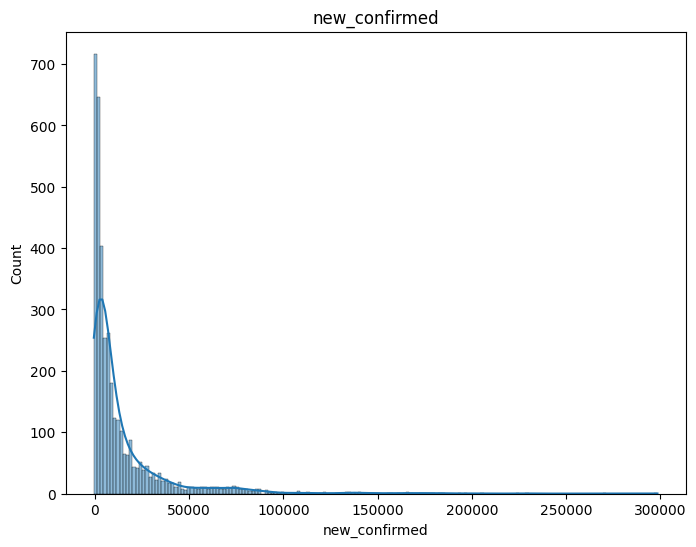

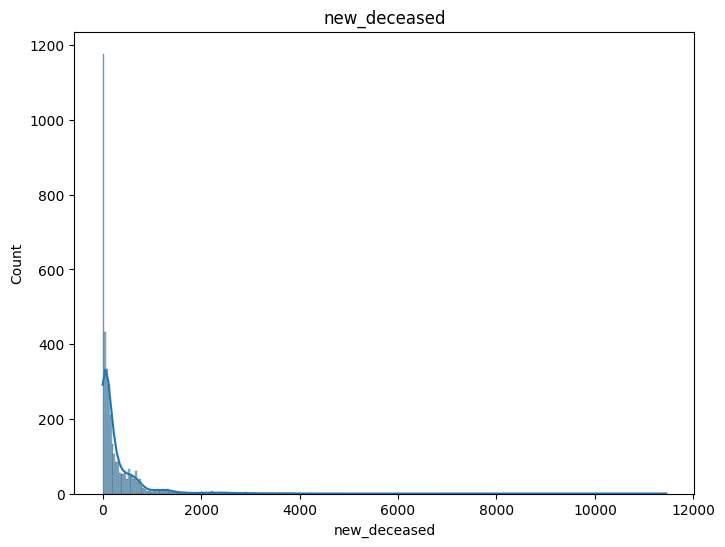

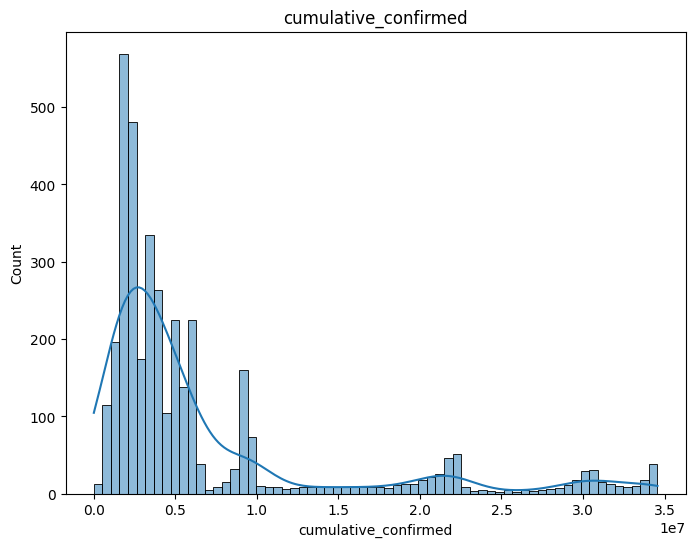

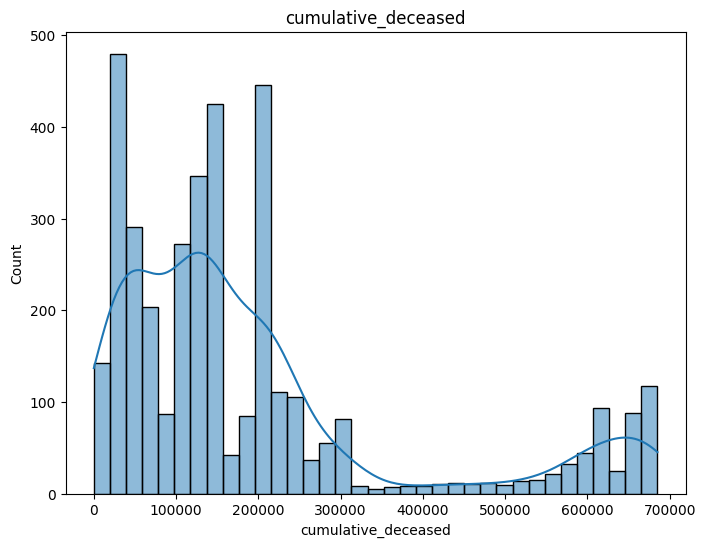

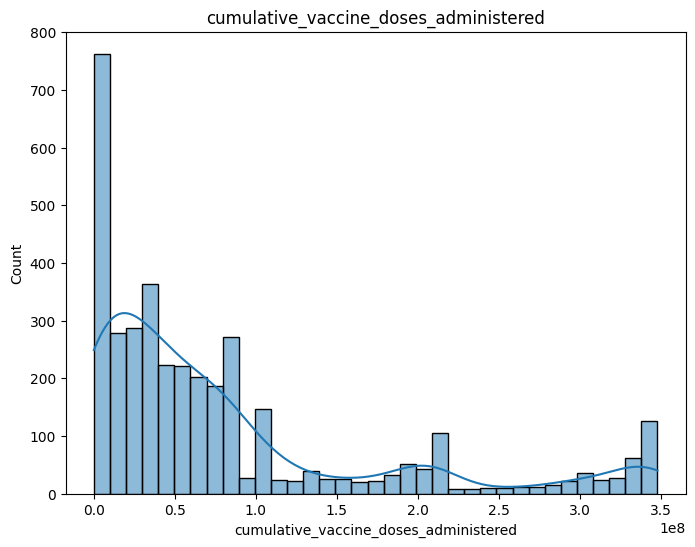

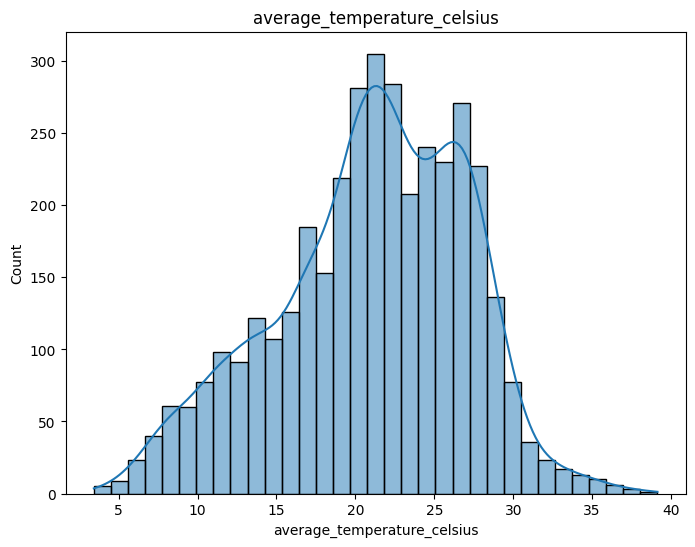

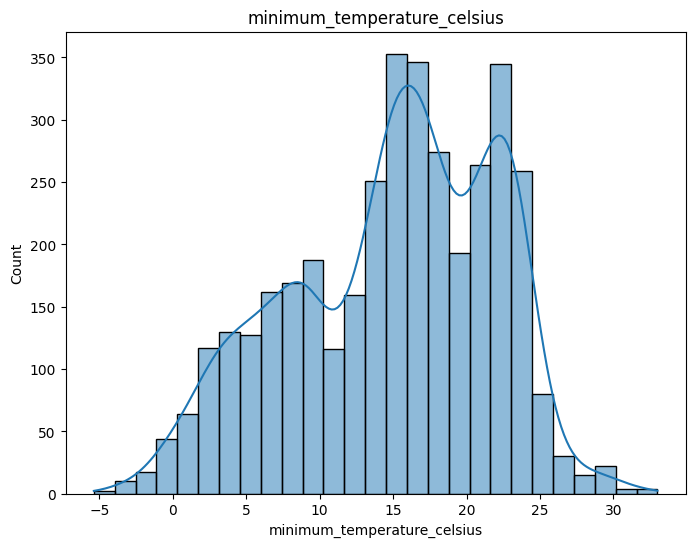

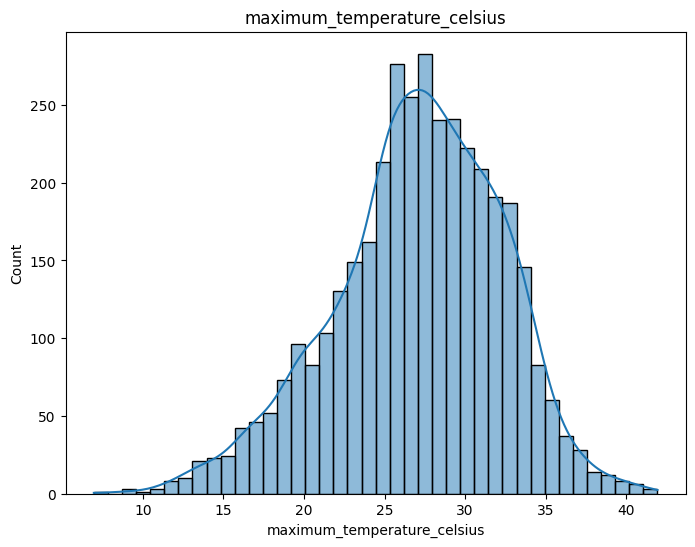

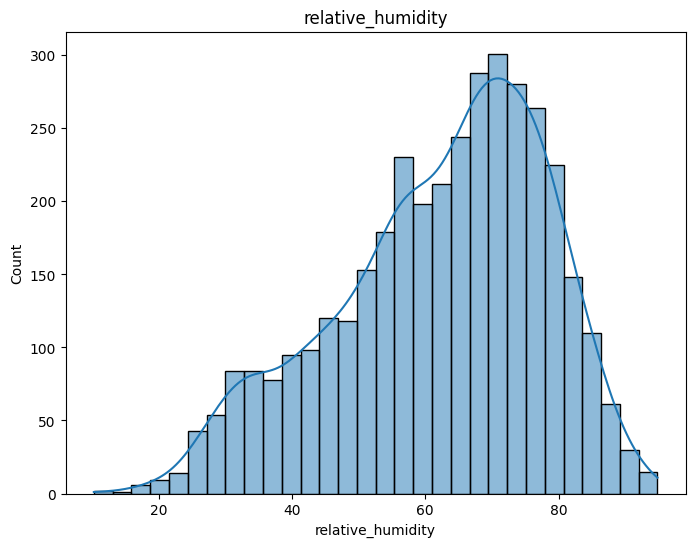

In [38]:
#ahora se crean histogramas para ver la distribucion de algunos datos
lista_columnas_graficar= ["new_confirmed", "new_deceased","cumulative_confirmed", "cumulative_deceased", "cumulative_vaccine_doses_administered", "average_temperature_celsius",
                          "minimum_temperature_celsius", "maximum_temperature_celsius", "relative_humidity"]
for i in data_latinoamerica_paises[lista_columnas_graficar]: # itera sobre cada columna en lista_columnas_graficar. La variable i toma el nombre de cada columna de la lista en cada iteración.
    fig, ax = plt.subplots(figsize=(8,6)) #Crea una figura (fig) y un eje (ax) para el gráfico, con un tamaño de 8x6 pulgadas. Esto establece el área donde se dibujará el histograma.

    sns.histplot(data_latinoamerica_paises[i], kde=True) #Utiliza Seaborn para crear un histograma de la columna actual i:
                #data_latinoamerica_paises[i]: Especifica los datos a graficar, que son los valores de la columna en la iteración actual.
                #kde=True: Activa la representación de la función de densidad kernel (KDE) sobre el histograma, 
                # lo que ayuda a visualizar la distribución de los datos suavizada, además de las barras del histograma.
                # Es la linea suave que muestra cómo se distribuyen esos valores en general, proporcionando una representación más clara y continua de la densidad.
    
    plt.title(i)
    plt.show()


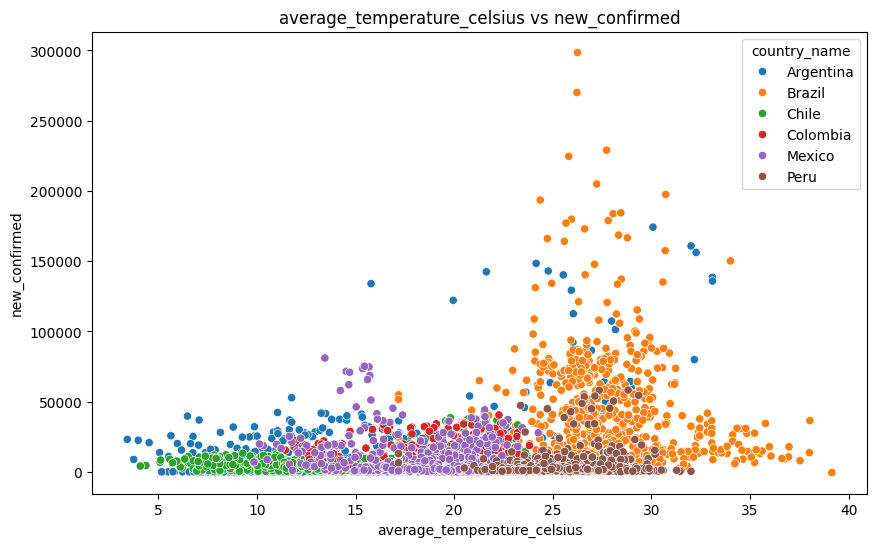

In [39]:
#para entender la relacion de cantidad de casos con la temperatura se grafican para analizar estas dos variables
#grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10,6)) #Crea una figura (fig) y un eje (ax) para el gráfico, con un tamaño de 10x6 pulgadas. Esto establece el área donde se dibujará el gráfico.


sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=data_latinoamerica_paises, hue="country_name")
#Utiliza Seaborn para crear un gráfico de dispersión:
#x="average_temperature_celsius": Asigna la temperatura promedio en grados Celsius al eje X. Cada punto del gráfico representará una observación con su correspondiente valor de temperatura.
#y="new_confirmed": Asigna el número de nuevos casos confirmados de COVID-19 al eje Y. Esto indica cuántos nuevos casos hay por cada valor de temperatura.
#data=data_latinoamerica_paises: Especifica el DataFrame que contiene los datos a graficar.
#hue="country_name": Utiliza la columna country_name para diferenciar los puntos en el gráfico por país, asignando diferentes colores a los puntos en función del país al que pertenecen.##

#El resultado de este código es un gráfico de dispersión que ilustra la relación entre la temperatura promedio y el número de nuevos casos confirmados de COVID-19. 
#Cada punto en el gráfico representa un país, y el color del punto indica a qué país pertenece. 
#Esto permite observar patrones o tendencias, como si existe una correlación entre la temperatura y la cantidad de nuevos casos confirmados.


plt.title("average_temperature_celsius vs new_confirmed")
plt.show()

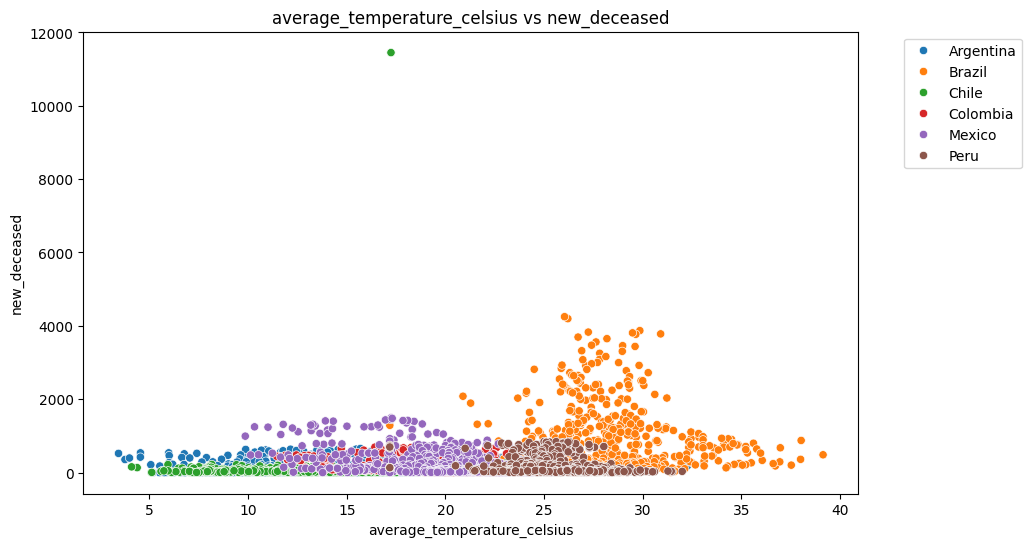

In [40]:
#relacion entre temperatura y cantidad de muertes

fig, ax = plt.subplots(figsize=(10,6)) #Crea una figura (fig) y un eje (ax) para el gráfico, con un tamaño de 10x6 pulgadas. Esto establece el área donde se dibujará el gráfico.


sns.scatterplot(x="average_temperature_celsius", y="new_deceased", data=data_latinoamerica_paises, hue="country_name")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")#se usa para ajustar la leyenda de un grafico
#bbox_to_anchor=(1.05, 1):
#Este argumento especifica la ubicación de la leyenda en términos de coordenadas de anclaje.
#bbox_to_anchor toma una tupla que representa las coordenadas (x, y) donde se quiere anclar la leyenda.
#En este caso, (1.05, 1) significa que la leyenda se anclará un poco a la derecha (1.05 en el eje x) y alineada en la parte superior (1 en el eje y) del área del gráfico.
#  Es decir, estará fuera del gráfico, desplazada hacia la derecha.
#loc="upper left":
#Este argumento especifica qué parte de la leyenda se alineará con las coordenadas especificadas en bbox_to_anchor.
#loc="upper left" significa que la esquina superior izquierda de la leyenda se alineará con el punto especificado en bbox_to_anchor.
#Como resultado, la leyenda se coloca en la parte superior izquierda de la posición especificada por (1.05, 1).

plt.title("average_temperature_celsius vs new_deceased")
plt.show()

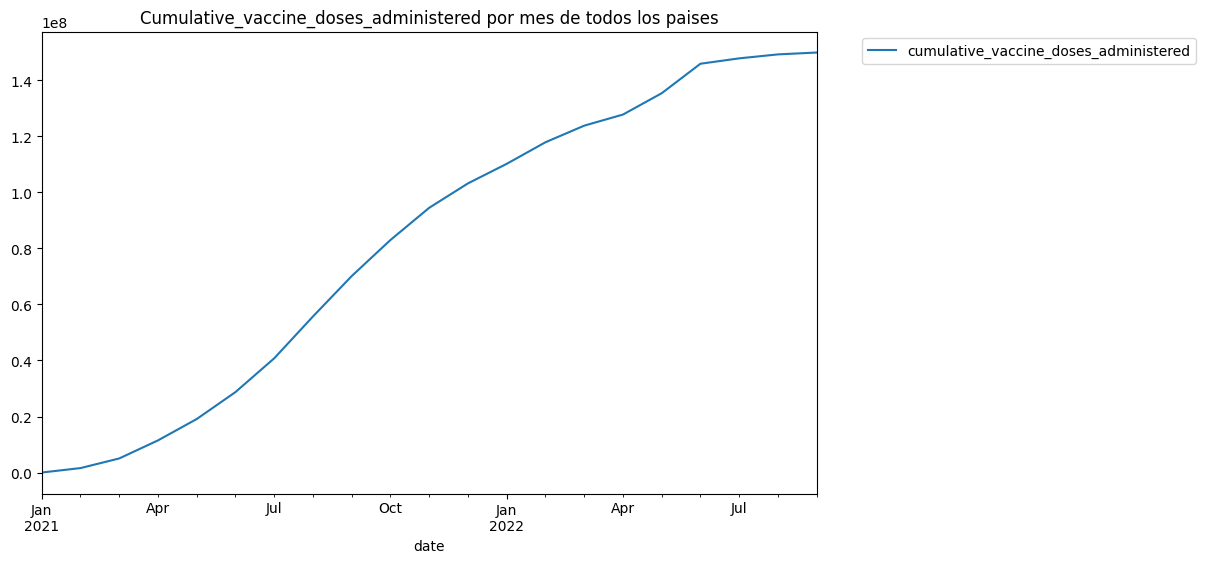

In [41]:
#grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10,6))
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc ="upper left")

plt.title("Cumulative_vaccine_doses_administered por mes de todos los paises")
plt.show()

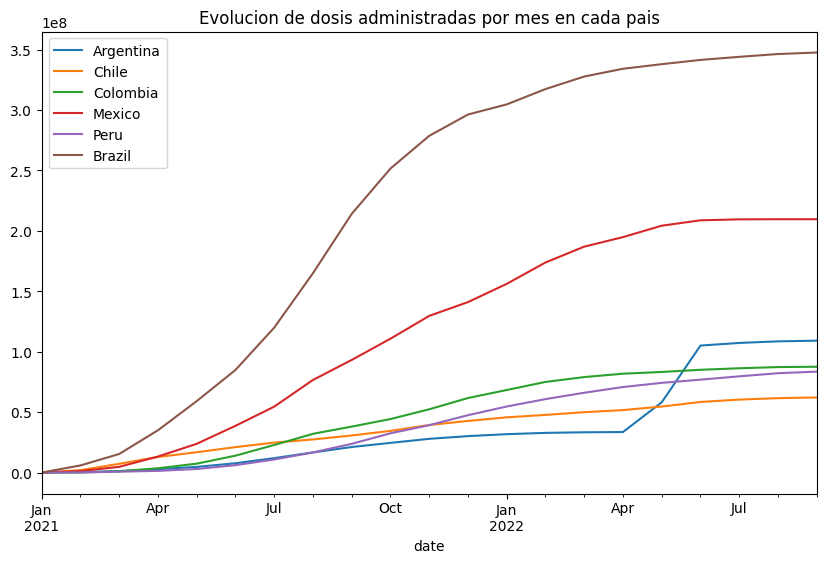

In [42]:
#grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
paises_usar = ["Argentina", "Chile", "Colombia","Mexico","Peru","Brazil"]
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_usar: #Este bucle recorre cada país en paises_usar. Para cada país:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
    #Se filtra el DataFrame data_latinoamerica_paises para obtener solo las filas que corresponden al país actual (data_latinoamerica_paises["country_name"]==pais).
    # Se utiliza resample("ME") para agrupar los datos por mes, y luego se calcula el promedio (mean) de las dosis administradas (cumulative_vaccine_doses_administered) para cada mes.
    # Finalmente, se plotea la serie temporal resultante utilizando el método plot(), que añade una línea al gráfico para ese país.
    




plt.title("Evolucion de dosis administradas por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05, 1), loc ="upper left")
plt.legend(paises_usar)

plt.show()

genera un gráfico de líneas que muestra cómo ha evolucionado el número promedio de dosis de vacunas administradas por mes en seis países de Latinoamérica (Argentina, Chile, Colombia, México, Perú y Brasil). Cada línea representa a un país y permite comparar visualmente la progresión de la vacunación en cada uno de ellos a lo largo del tiempo. La leyenda y el título ayudan a clarificar la información presentada.


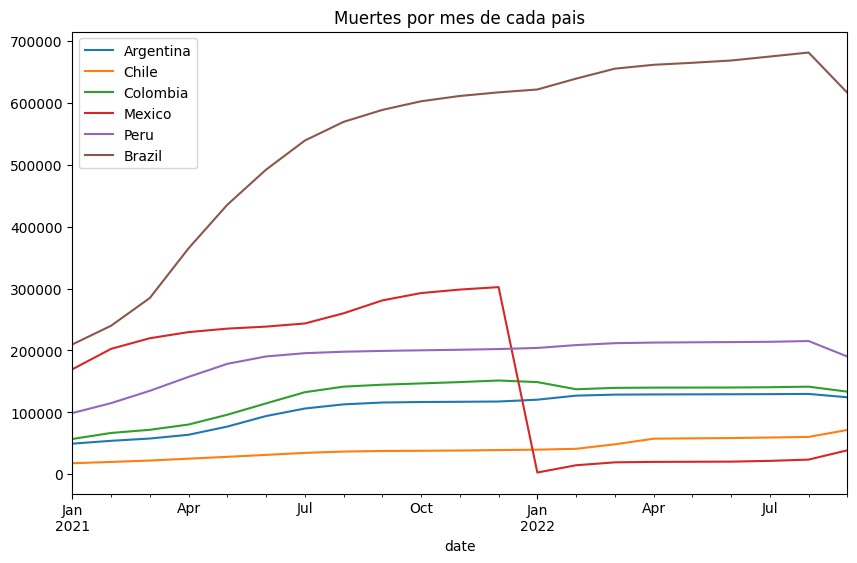

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_usar:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.title("Muertes por mes de cada pais")
plt.legend(bbox_to_anchor=(1.05,1), loc = "upper left")
plt.legend(paises_usar)
plt.show()

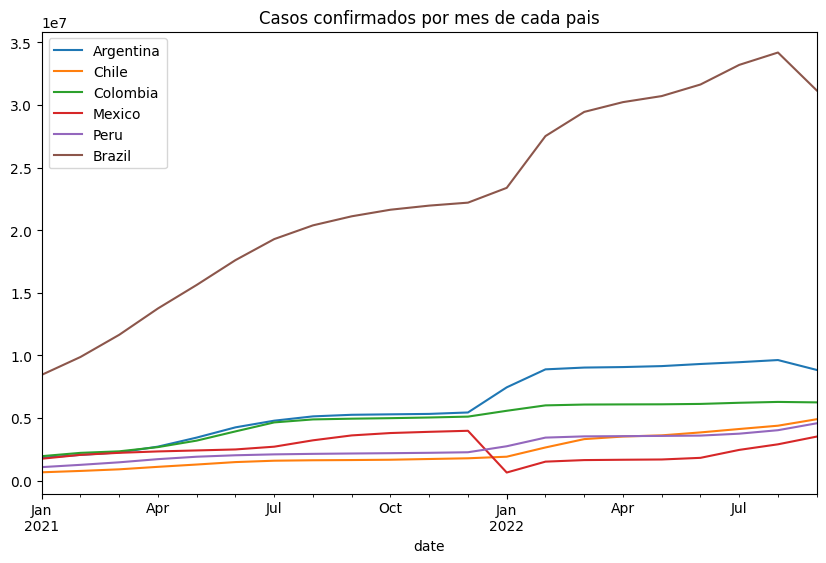

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_usar: #Itera sobre cada país en la lista paises_usar, la cual contiene los nombres de los países que se desean graficar. Este bucle permite crear una línea para cada país en el gráfico.
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
#Filtra el DataFrame data_latinoamerica_paises para obtener solo las filas correspondientes al país actual (pais) en cada iteración.
#Después de seleccionar el país, este método aplica un remuestreo (resample) de los datos. 
# 'ME' indica que se quiere agrupar por mes, tomando el valor final de cada mes (mes completo). 
# mean(numeric_only=True) calcula la media de todas las columnas numéricas, obteniendo así el promedio mensual de cada columna.
#
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_usar)
plt.show()

El país que más casos confirmados ha tenido es Brasil. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

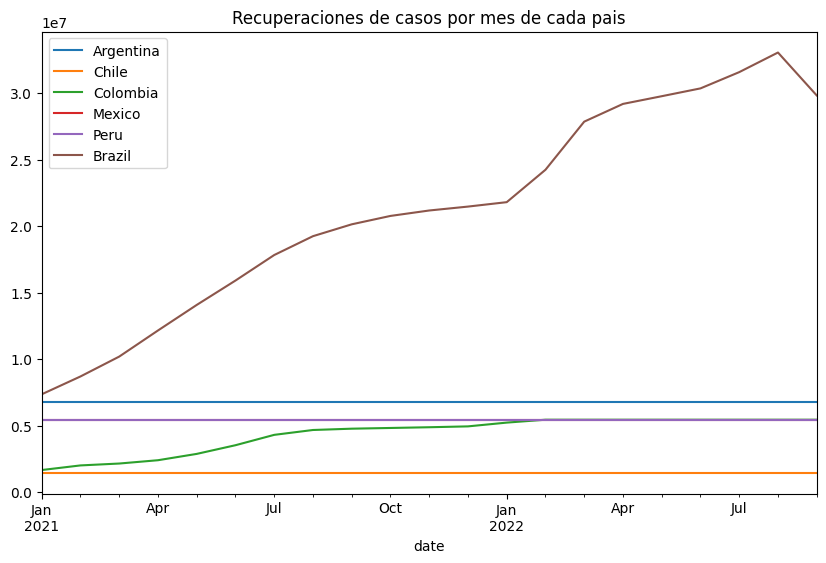

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_usar:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_usar)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

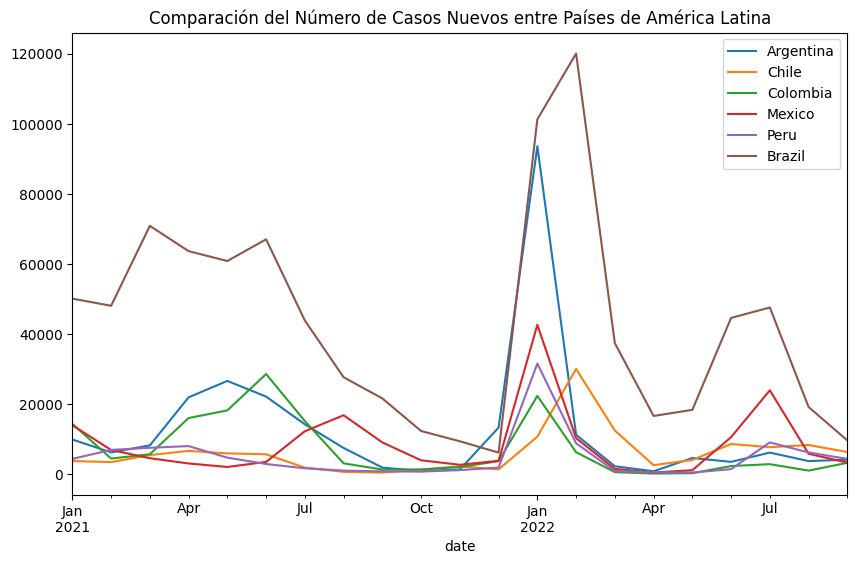

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_usar:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_usar)
plt.show()

De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

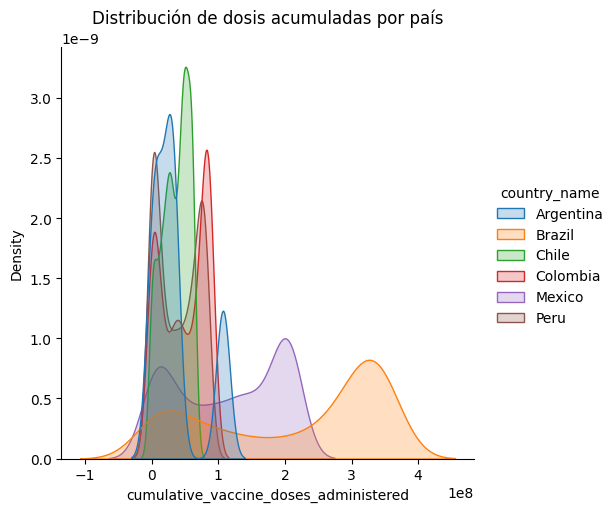

In [47]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

Brasil parece tener la curva de densidad con valores más altos en el extremo derecho del gráfico. Esto sugiere que ha administrado una gran cantidad acumulada de dosis en comparación con los otros países.
México muestra una dispersión amplia y ligeramente desplazada a la derecha, lo cual sugiere que también ha administrado una cantidad considerable de dosis, aunque con mayor variabilidad.
Colombia y Chile parecen tener concentraciones en valores de dosis más bajos, lo que podría indicar menos dosis acumuladas administradas.

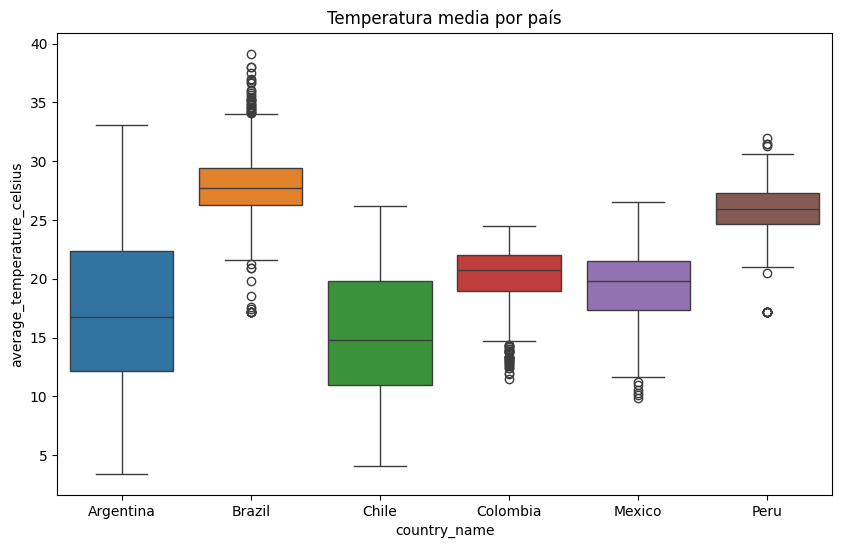

In [48]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name') #Usa la función boxplot de Seaborn para crear el gráfico de cajas y bigotes.

#x='country_name': Establece que cada caja en el gráfico representará un país diferente, tomando los valores de la columna country_name para la ubicación en el eje X.
#y='average_temperature_celsius': Define la variable a mostrar en el eje Y, que es la temperatura media. Cada caja representa la distribución de la temperatura media en cada país.
#data=data_latinoamerica_paises: Especifica el DataFrame que contiene los datos.
#hue='country_name': En este caso, no es necesario incluir hue="country_name" porque no aporta una distinción adicional dentro de cada país en un boxplot. 
# Sin embargo, aquí agrega una leyenda que indica los colores asignados a cada país.


plt.title('Temperatura media por país')
plt.show()

 permite comparar la variabilidad de las temperaturas medias entre los países. Países con cajas más pequeñas tienen temperaturas más consistentes, mientras que aquellos con cajas más grandes muestran mayor variabilidad.

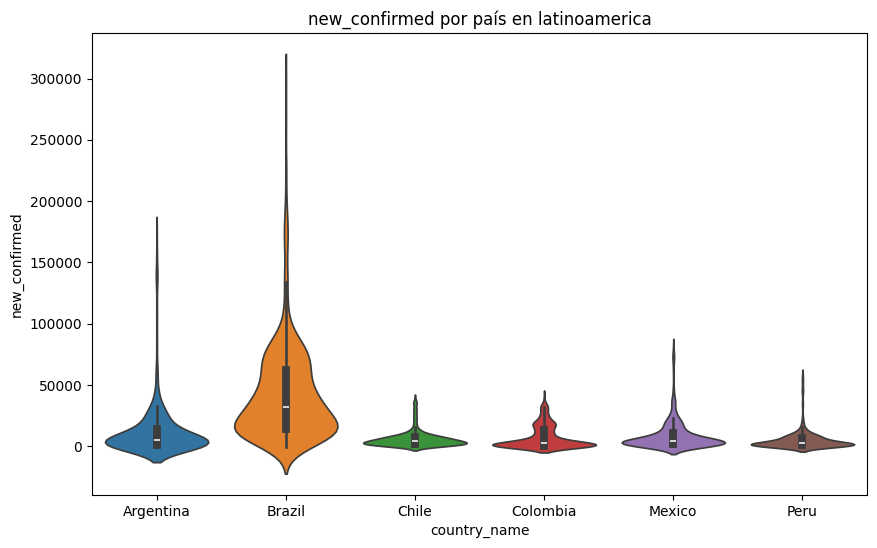

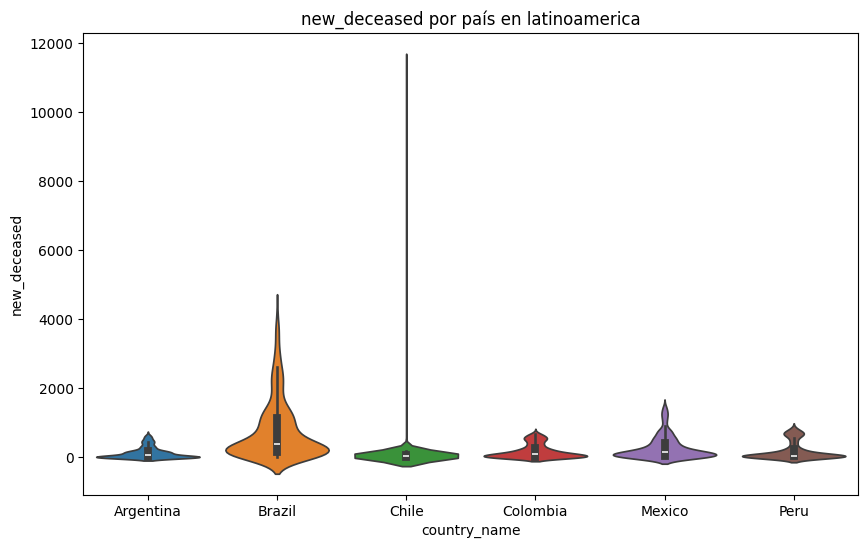

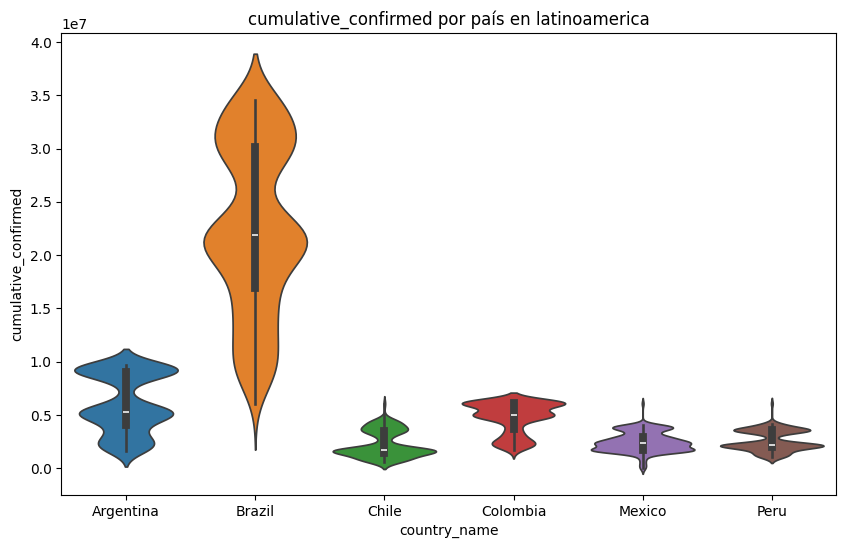

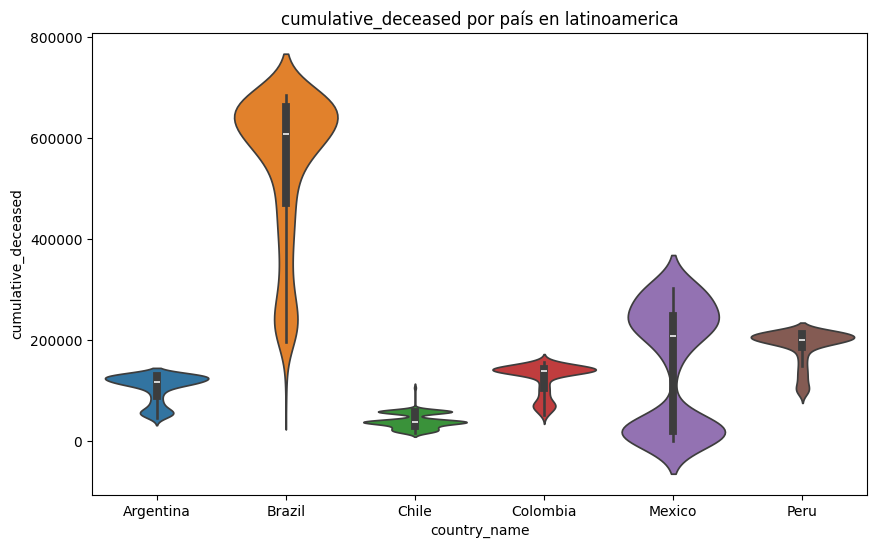

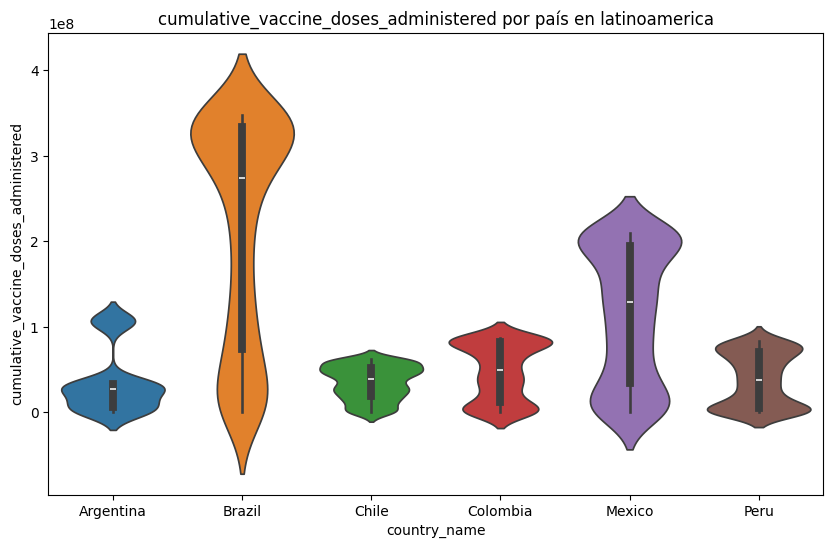

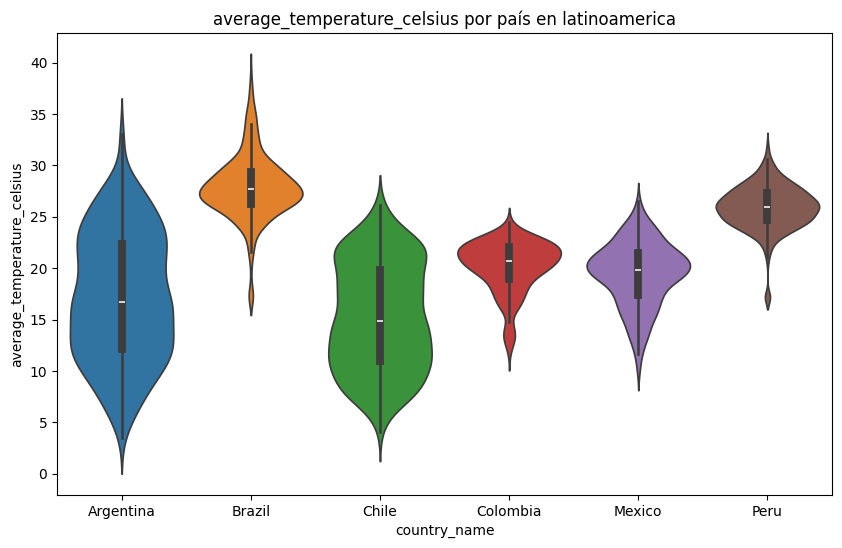

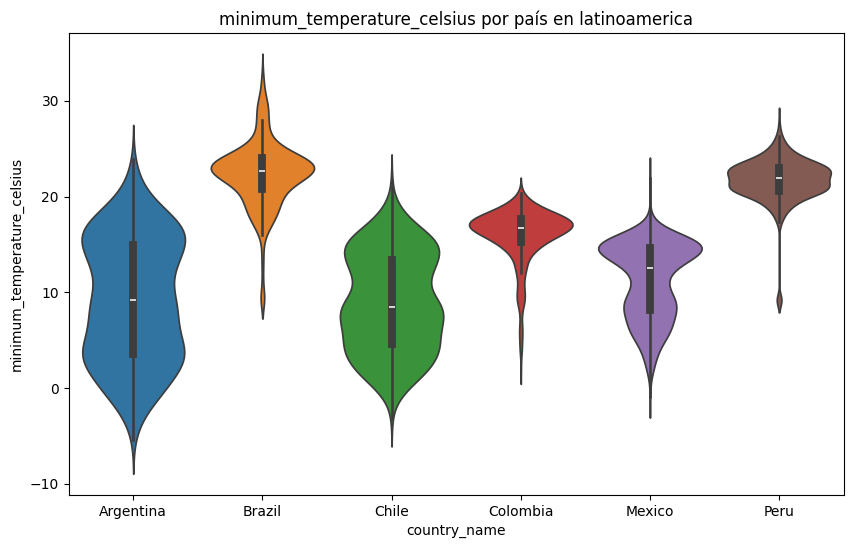

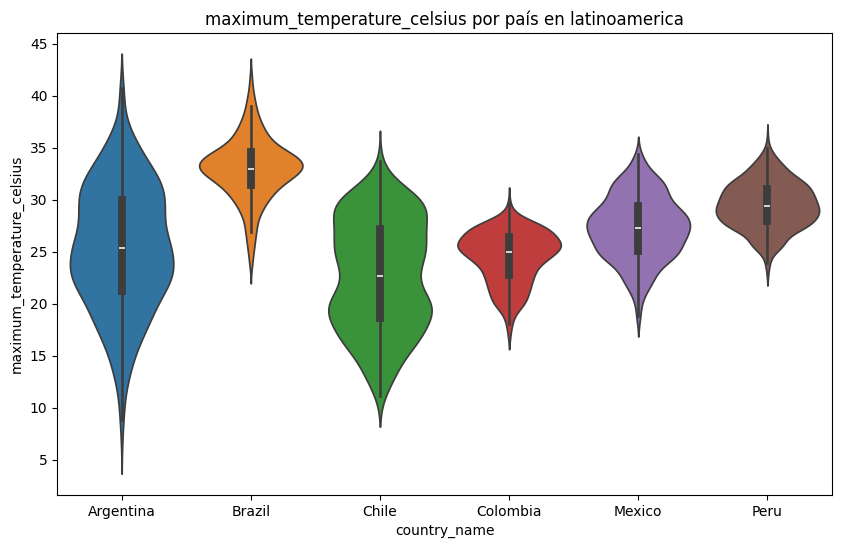

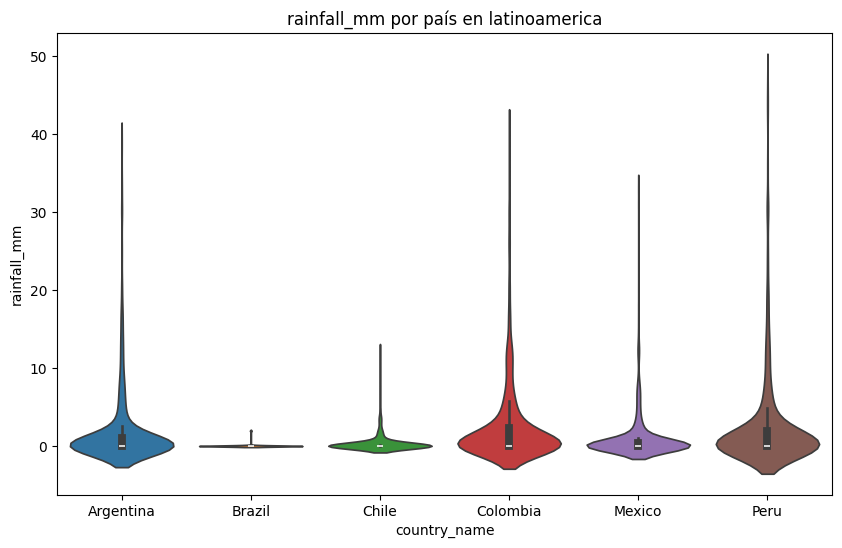

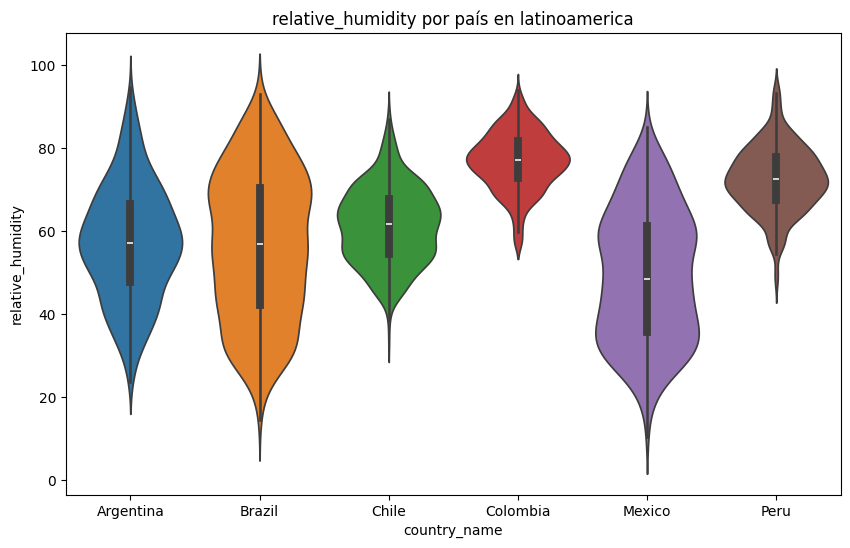

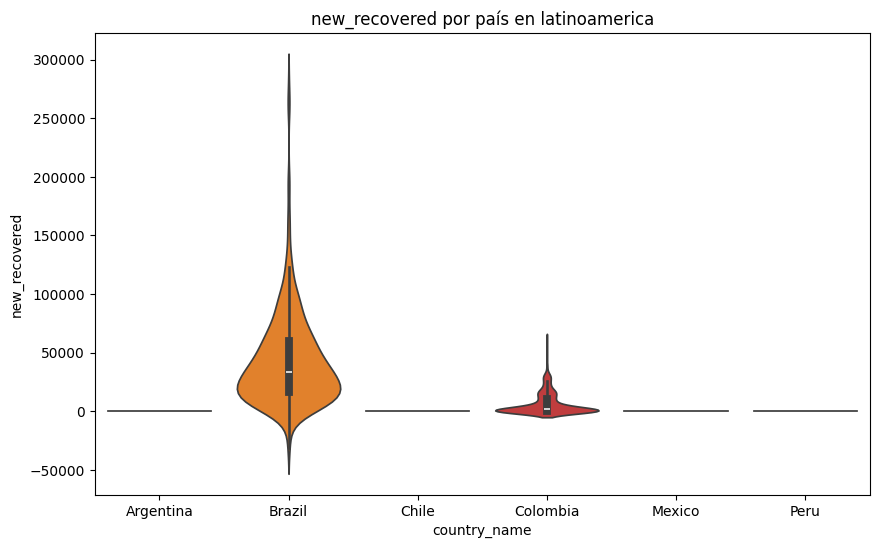

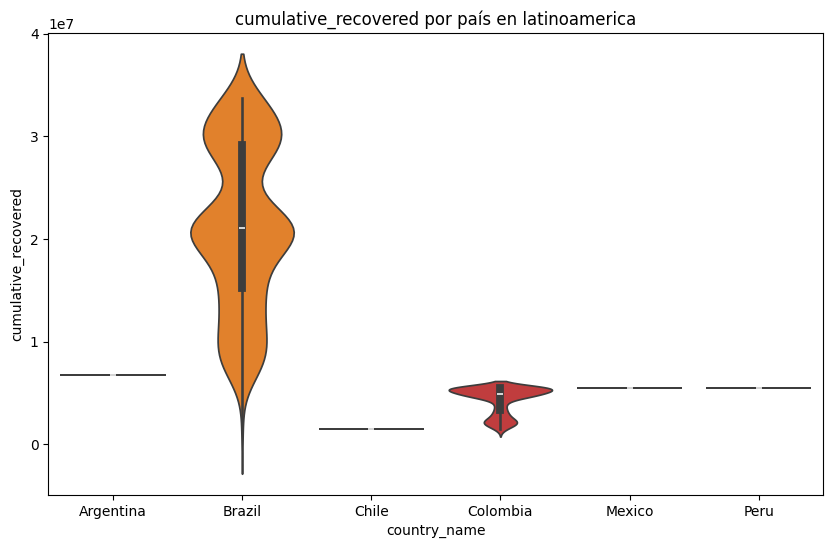

In [49]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6: #Comprueba si la columna tiene más de 6 valores únicos (indicando que tiene suficiente variabilidad). 
            #Si cumple esta condición, la columna se agrega a la lista columnas_mayores_6.
            columnas_mayores_6.append(i) 


#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name') #Se agrega la columna country_name a la lista para que el análisis pueda segmentarse por país

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]#Se crea un nuevo DataFrame que incluye solo las columnas con suficiente variabilidad.
#(mayores a 6 valores únicos) y la columna country_name


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

El gráfico de violín muestra la distribución de cada variable (por ejemplo, cumulative_confirmed) para cada país:

Forma del Gráfico: La anchura de cada gráfico de violín representa la densidad de la distribución. Un gráfico ancho indica que hay una alta concentración de datos en ese rango.
Mediana: Generalmente, los gráficos de violín también muestran una línea central que representa la mediana de la variable para cada país.
Comparación entre Países: Permite ver las diferencias en la distribución de una variable entre países, lo cual puede ayudar a identificar países con valores consistentemente altos o bajos en esa variable.
Este enfoque es útil para comparar visualmente la variabilidad y tendencia central de varias métricas en cada país de América Latina.

In [50]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09           72354498.0
population_age_10_19           75821668.0
population_age_20_29           75953404.0
population_age_30_39           72153175.0
population_age_40_49           59596656.0
population_age_50_59           47961620.0
population_age_60_69           32654396.0
population_age_70_79           17789478.0
population_age_80_and_older     8711719.0
dtype: float64

Este código analiza la distribución de la población en diferentes grupos de edad para cada país en los datos de data_latinoamerica_paises. A continuación se explican cada uno de los pasos:
Definir las Columnas de Interés: Aquí se crea una lista llamada cut_columns que contiene el nombre del país (country_name) y varias columnas relacionadas con la población en diferentes grupos de edad.
Obtener el Último Registro de Cada País y Ordenar por un Grupo de Edad:

data_latinoamerica_paises[cut_columns]: Selecciona solo las columnas de cut_columns en el DataFrame data_latinoamerica_paises.
.groupby('country_name').last(): Agrupa los datos por country_name y toma el último registro de cada grupo. Esto se hace con la suposición de que el último registro representa los datos más recientes de cada país.
.sort_values(by='population_age_00_09'): Ordena los resultados según la columna population_age_00_09 en orden ascendente. Esto permite observar los países ordenados por el tamaño de la población en el grupo de edad de 0 a 9 años.
Definir las Columnas de Edad: Se crea una lista llamada age_columns con solo las columnas que representan los grupos de edad. Esto será útil para calcular la distribución total por cada grupo de edad sin incluir country_name.
Calcular la Distribución Total por Edad: last_cases[age_columns]: Selecciona solo las columnas de grupos de edad del DataFrame last_cases.
.sum(): Suma los valores de cada columna de grupos de edad. El resultado es una Serie de pandas (age_distribution) que representa la distribución total de la población para cada grupo de edad en todos los países.
Mostrar la Distribución de Edad: La variable age_distribution contiene la suma total de la población para cada grupo de edad en todos los países, lo que da una visión general de la estructura de edad de la población en los datos disponibles.
Interpretación de age_distribution
Este resultado muestra la cantidad de personas en cada grupo de edad acumulado en todos los países. Esto permite ver, por ejemplo, qué grupo de edad tiene la mayor población total en los países analizados, proporcionando una visión general de la distribución de edades en América Latina.

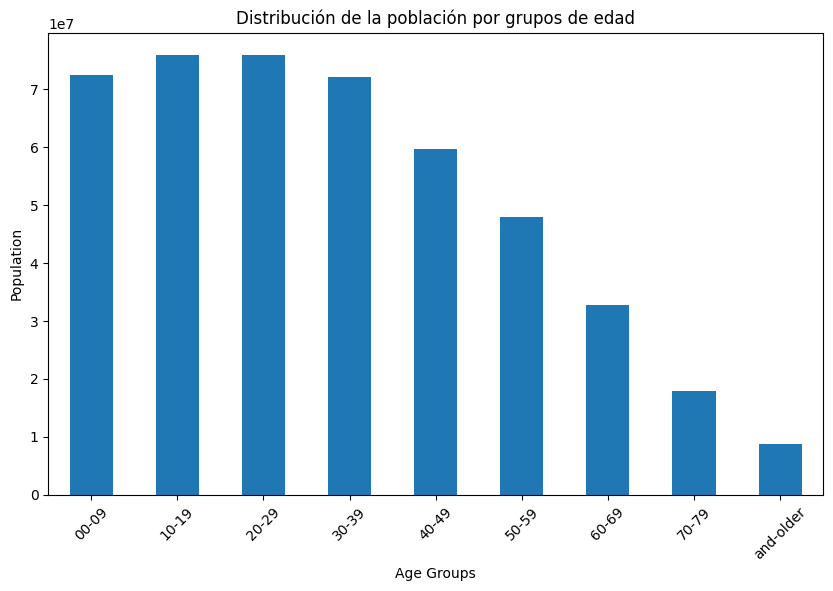

In [51]:
# Calculamos la distribucion de la poblacion por grupos de edad


plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True) #Crea un gráfico de barras donde cada grupo de edad es una barra en el gráfico.
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45) #plt.xticks(): Personaliza las etiquetas en el eje x.
#range(len(age_columns)): Define la posición de cada etiqueta.
#[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns]: Toma el rango de edad de cada columna, usando los dos últimos segmentos del nombre (ej., convierte population_age_00_09 en 00-09).
#rotation=45: Rota las etiquetas 45 grados para mejor legibilidad.
plt.show()

Este gráfico permite visualizar la distribución de población en diferentes grupos de edad, lo que puede dar información sobre la estructura etaria y ayudar a identificar los grupos de edad más representativos en la población de estos países.

In [52]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

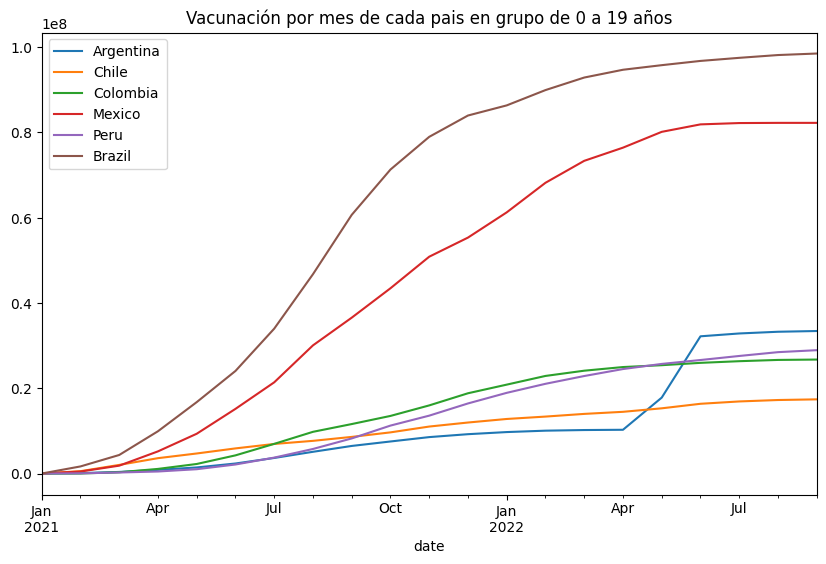

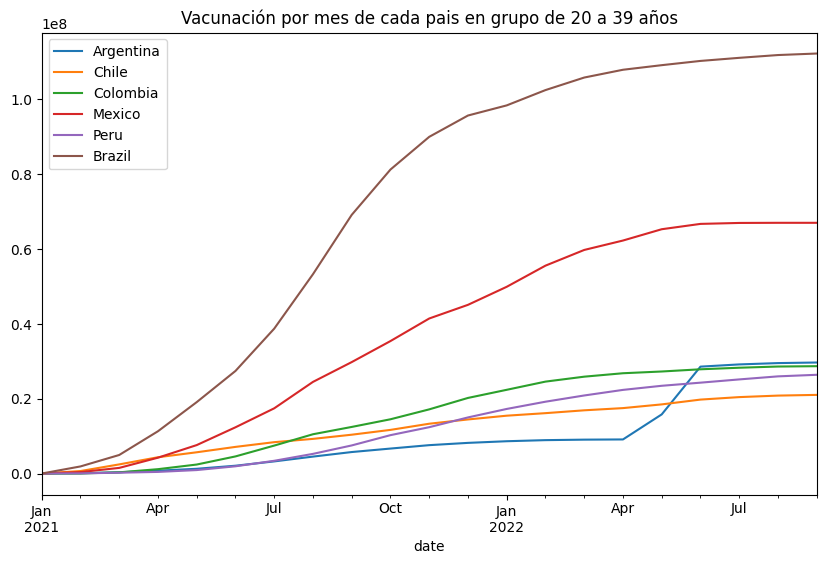

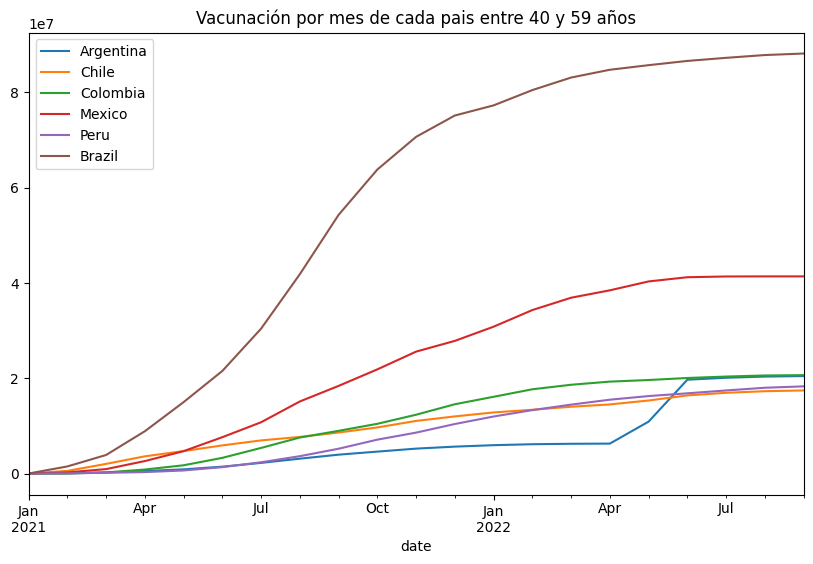

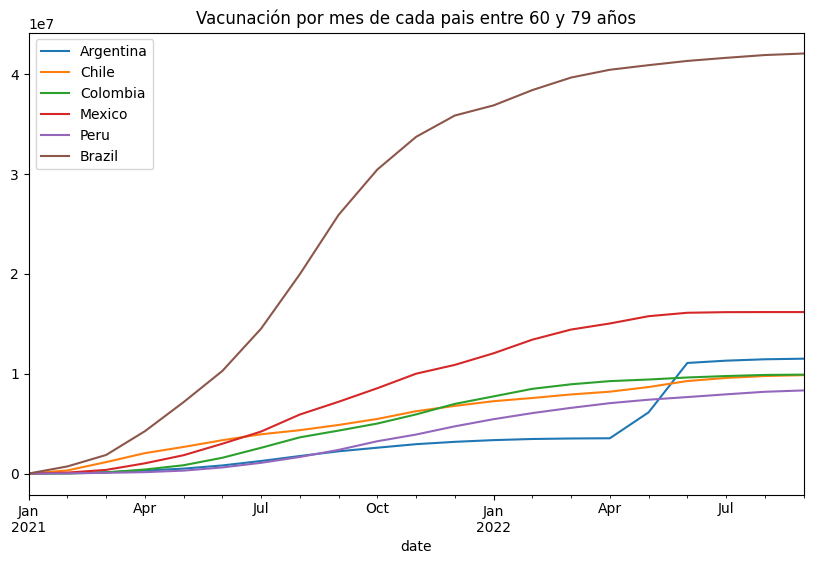

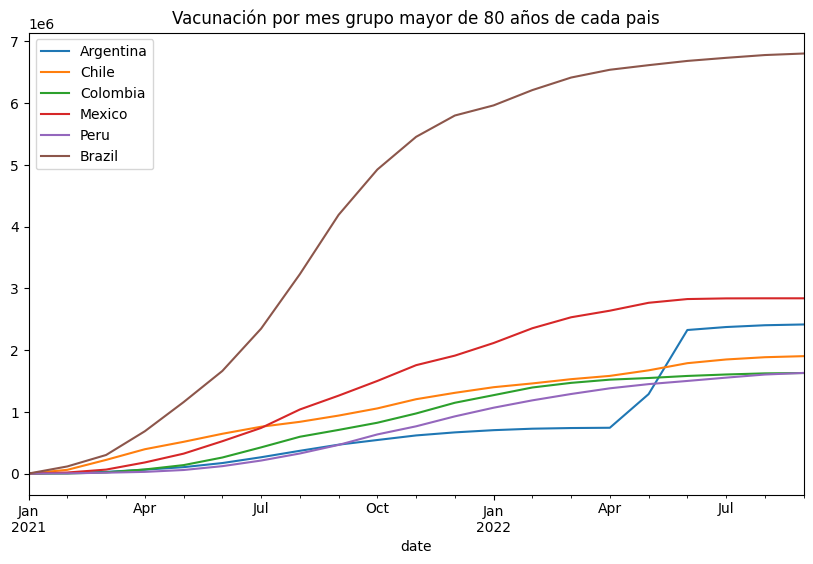

In [53]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']
#Aquí se están creando nuevas columnas que agrupan diferentes rangos de edad en la población de cada país en el DataFrame data_latinoamerica_paises. 
# Por ejemplo, la población en el grupo de edad de 0 a 19 años se calcula sumando las poblaciones de los grupos de 0 a 9 años y de 10 a 19 años.

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']
#Para cada grupo de edad, se calcula el número de vacunados multiplicando el total de dosis administradas (cumulative_vaccine_doses_administered) por la población de cada grupo y dividiendo por la población total del país.
#Esto genera nuevas columnas que representan la cantidad de vacunados en cada grupo de edad.

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)
#Después de calcular los vacunados, se reemplazan los valores nulos (NaN) en las nuevas columnas por 0, lo que asegura que no haya problemas al trabajar con estos datos más adelante.

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)
#Se convierten las columnas de vacunados a tipo de datos entero, lo que puede facilitar su manejo y visualización.


data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()
#Se calculan las sumas totales de los vacunados para cada grupo de edad.


# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

este código agrega información sobre la población y las dosis de vacunas administradas, calcula el número de vacunados en diferentes grupos de edad y genera gráficos para mostrar el progreso de la vacunación en varios países de Latinoamérica.

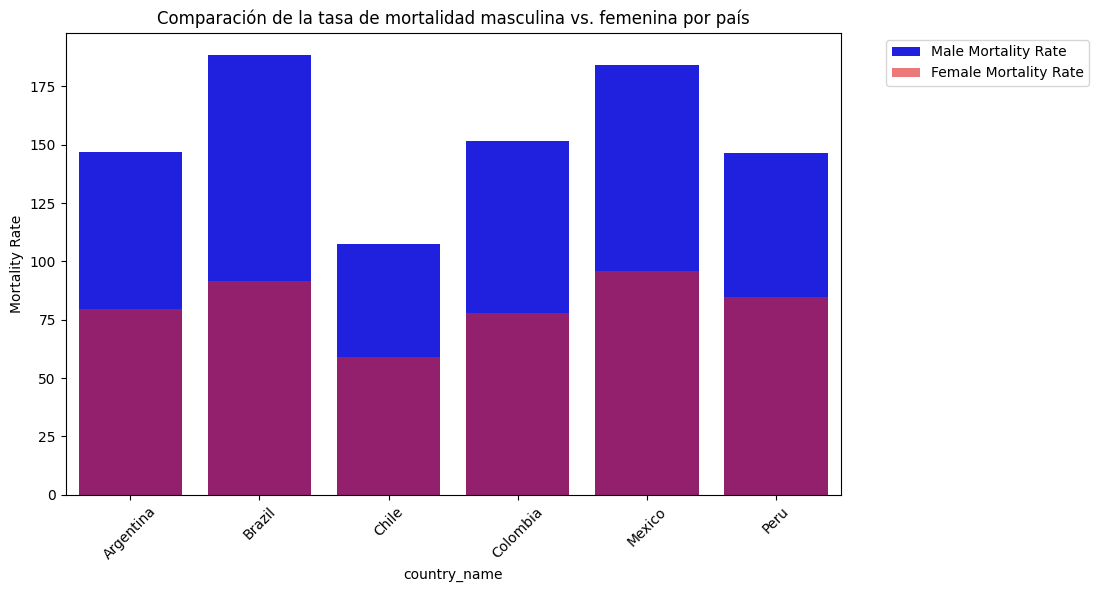

In [54]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Gráfico de barras que compara las tasas de mortalidad masculina y femenina para varios países. Utiliza colores distintos para cada grupo y se asegura de que las etiquetas sean legibles. La transparencia de las barras femeninas permite visualizar mejor cómo se superponen con las barras masculinas.
En todos los paises son mas las muertes masculinas que femeninas, siendo estos mas vulnerables

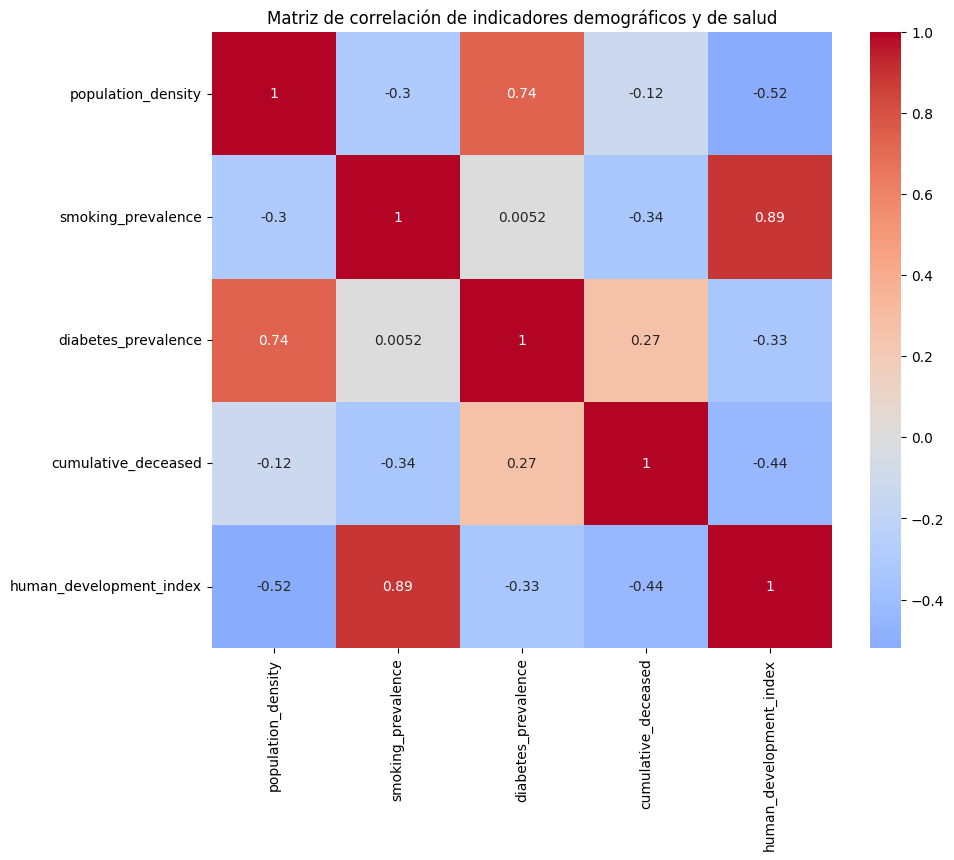

In [55]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

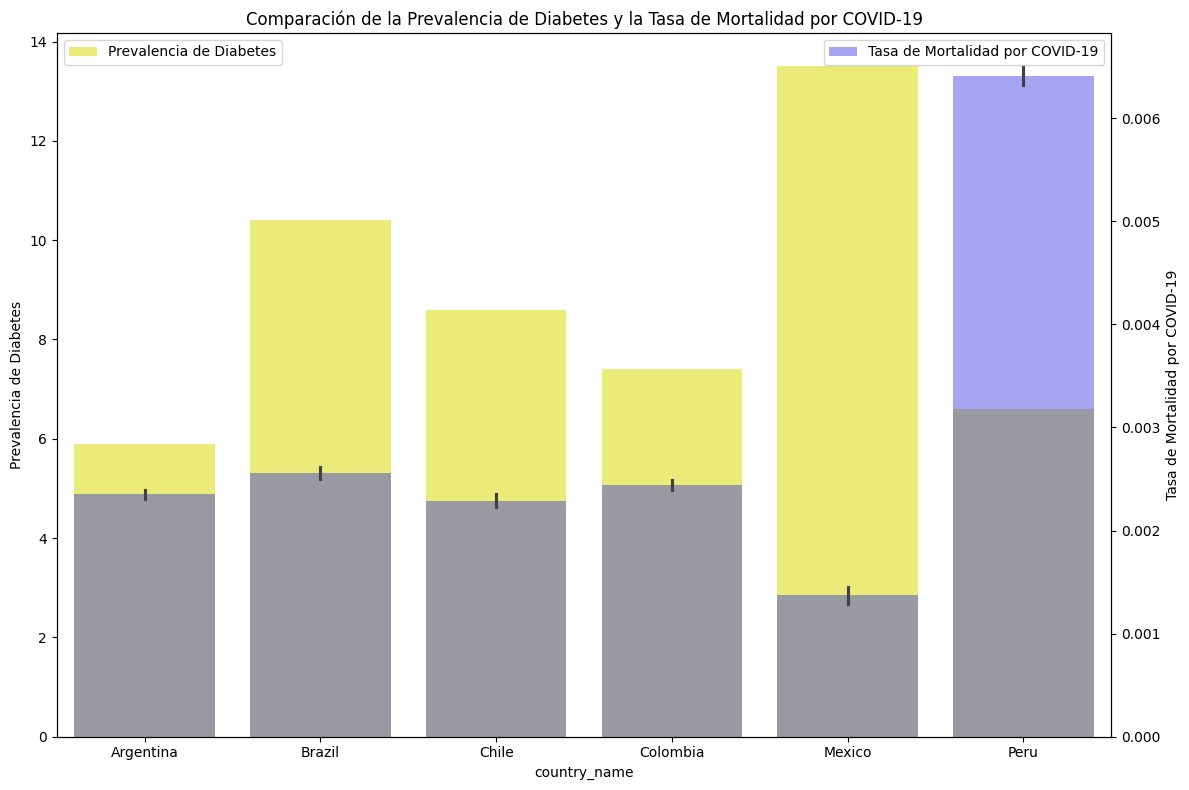

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
) #Se crea un gráfico de barras que muestra la prevalencia de diabetes (diabetes_prevalence) para cada país (country_name).
#Las barras son de color amarillo y tienen un nivel de transparencia (alpha=0.6), lo que permite ver otras barras que puedan estar debajo.
#El gráfico se dibuja en los ejes ax.

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)
#Se añade otro gráfico de barras que muestra la tasa de mortalidad por COVID-19. 
# Esta tasa se calcula como la cantidad de fallecidos acumulados (cumulative_deceased) dividida por la población total del país (population).
#Las barras son de color azul y tienen un nivel de transparencia (alpha=0.4).


plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Este código genera un gráfico combinado que permite comparar la prevalencia de diabetes y la tasa de mortalidad por COVID-19 en diferentes países de Latinoamérica. Utiliza dos ejes Y diferentes para mostrar ambas métricas, cada una con su propia escala, lo que facilita la comparación visual entre estas dos variables. La rotación de las etiquetas y la disposición de las leyendas mejoran la claridad del gráfico.

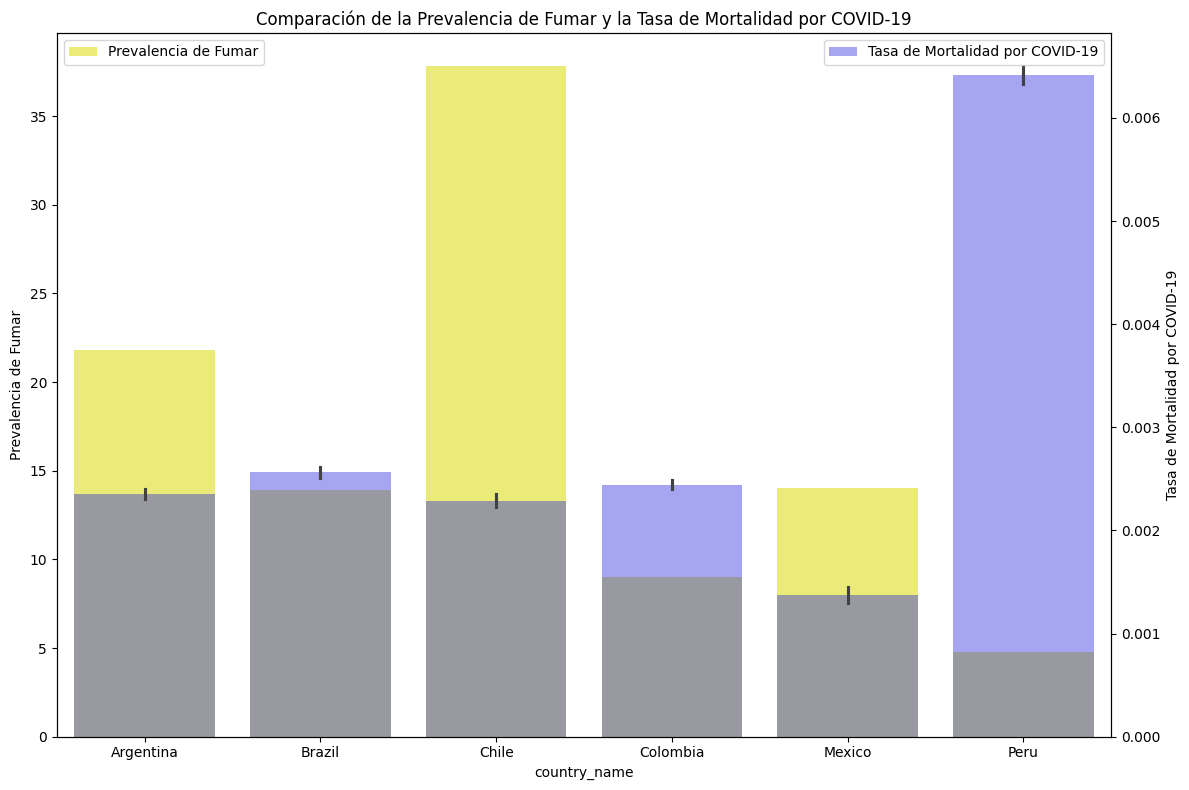

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.


Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

# Avance 3

In [58]:
data_latinoamerica_paises = pd.read_csv("dataset_filtrado_limpio.csv") # leemos nuevamente
data_latinoamerica_paises # lo mostramos

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  \
0                                       0.0  44938712.0  ...   
1                                       0.0  44938712.0  ...   
2                                       0.0  44938712.0  ...   
3                                       0.0  44938712.0  ...   
4                                       0.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                             83624934.0  29381884.0  ...   
3740                             83624934.0  29381884.0  ...   
3741                             83624934.0  29381884.0  ...   
3742                             83624934.0  29381884.0  ...   
3743                             83624934.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [59]:
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"]) # nuevamente seteamos la columna date como tipo fecha aunque ya se habia hecho
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date") #la configuramos como indice
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   
...                                           ...         ...   
2022-09-13                             83624934.0  29381884.0   
2022-09-14                             83624934.0  29381884.0   
2022-09-15                             83624934.0  29381884.0   
2022-09-16                             83624934.0  29381884.0   
2022-09-17                             83624934.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [60]:
data_latinoamerica_paises["week"] = data_latinoamerica_paises.index.isocalendar().week #creamos una nueva columna y la llenamos extrellendo el numero de columna de la fecha
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   
...                                           ...         ...   
2022-09-13                             83624934.0  29381884.0   
2022-09-14                             83624934.0  29381884.0   
2022-09-15                             83624934.0  29381884.0   
2022-09-16                             83624934.0  29381884.0   
2022-09-17                             83624934.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [61]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[   #generamos un nuevo data set con solo el año 2021
    (data_latinoamerica_paises.index >= "2021-01-01") &
    (data_latinoamerica_paises.index <= "2021-12-31")
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [62]:
weekly_cases = data_latinoamerica_paises_2021.groupby(["country_name","week"])[["new_confirmed","new_deceased"]].sum().reset_index()
# se agrupa por pais y semana y calculo la sumatoria de las columnas de nuevos confirmado y nuevos fallecidos
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [63]:
weekly_cases["country_name"].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

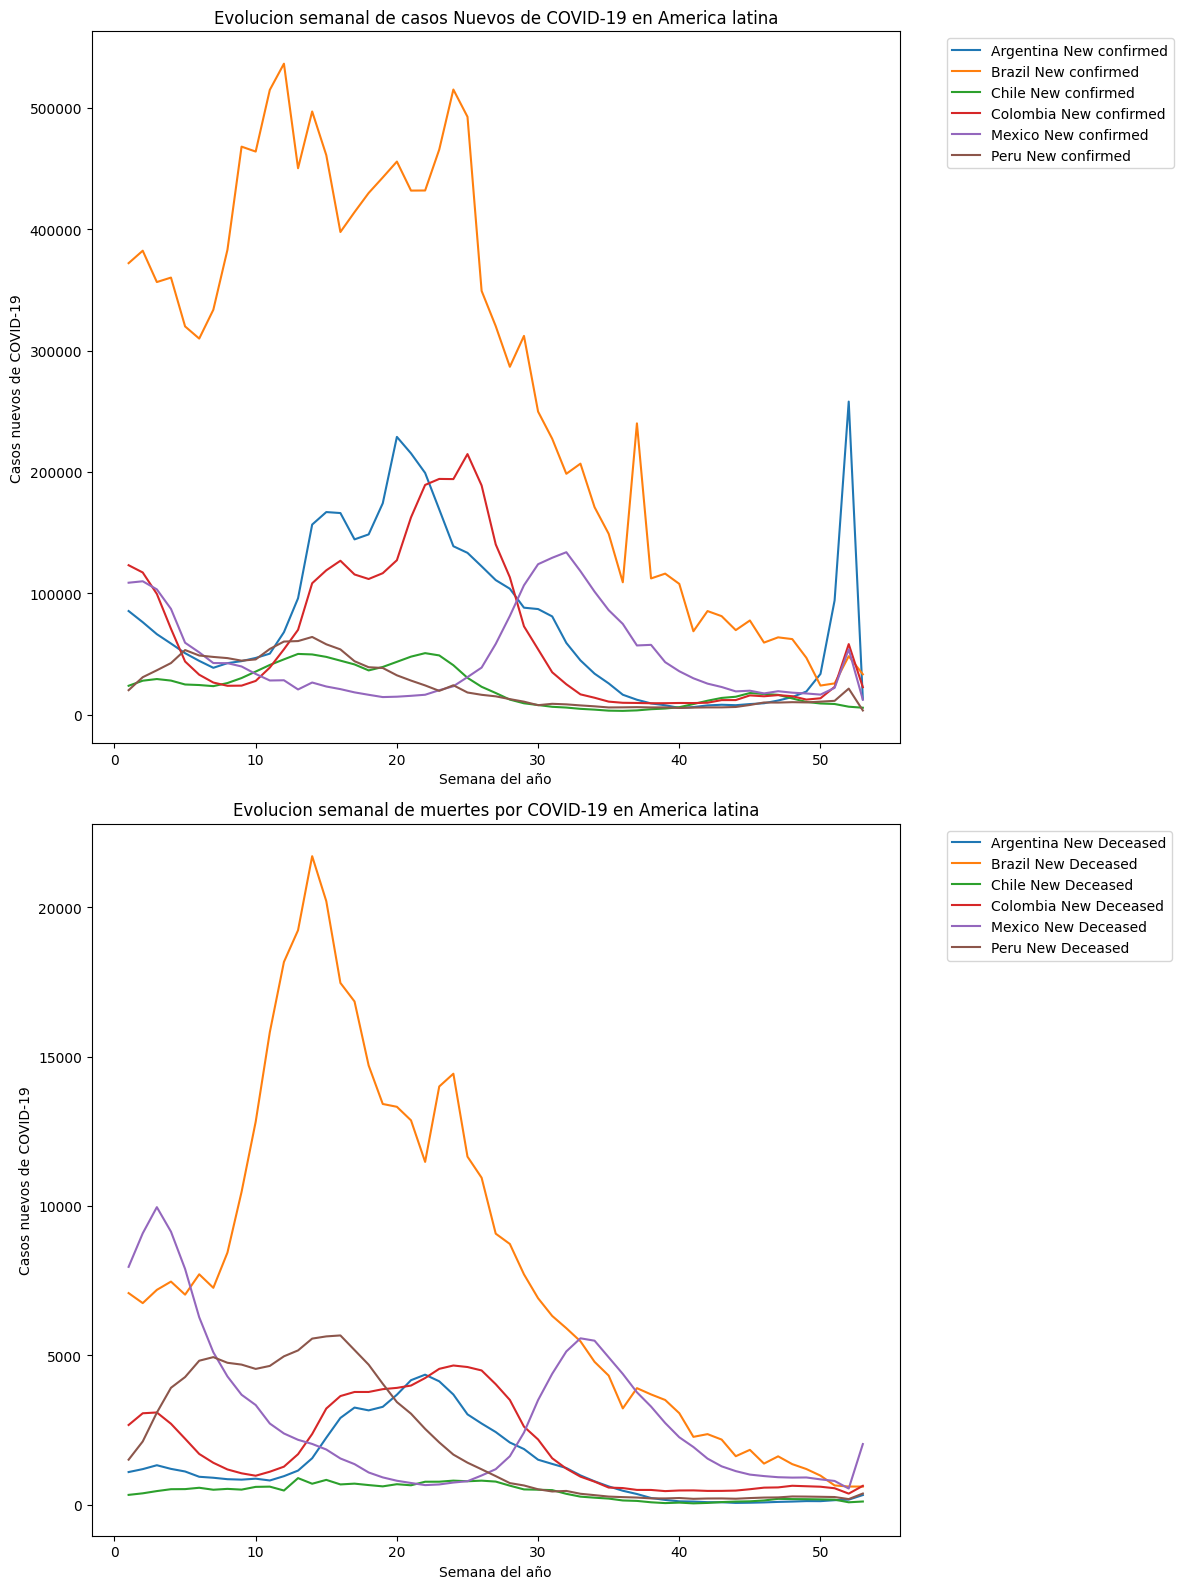

In [64]:
#evolutivo semanal de casos de covid

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in weekly_cases["country_name"].unique(): #Este bucle recorre cada país único en la columna "country_name" del DataFrame weekly_cases

    country_weekly_cases = weekly_cases[weekly_cases["country_name"]==country] #se crea un subconjunto de datos (country_weekly_cases) que contiene solo los datos de un país específico

    ax[0].plot(country_weekly_cases["week"], country_weekly_cases["new_confirmed"], label=f'{country} New confirmed')
    #se grafican los casos confirmados nuevos de cada país (new_confirmed) en función de la semana (week).
    ax[1].plot(country_weekly_cases["week"], country_weekly_cases["new_deceased"], label=f'{country} New Deceased')
    #se grafican las muertes nuevas (new_deceased) en función de la semana (week)


ax[0].set_xlabel("Semana del año")
ax[0].set_ylabel("Casos nuevos de COVID-19")
ax[0].set_title("Evolucion semanal de casos Nuevos de COVID-19 en America latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax[1].set_xlabel("Semana del año")
ax[1].set_ylabel("Casos nuevos de COVID-19")
ax[1].set_title("Evolucion semanal de muertes por COVID-19 en America latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()



Este código en Python utiliza la biblioteca matplotlib para crear dos gráficos apilados verticalmente (uno sobre el otro) en los que se representan, por cada país en América Latina, la evolución semanal de los casos confirmados de COVID-19 y las muertes.



C:\Users\ERBC\AppData\Local\Temp\ipykernel_7140\288223256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_2021["month"]=data_latinoamerica_paises_2021.index.month


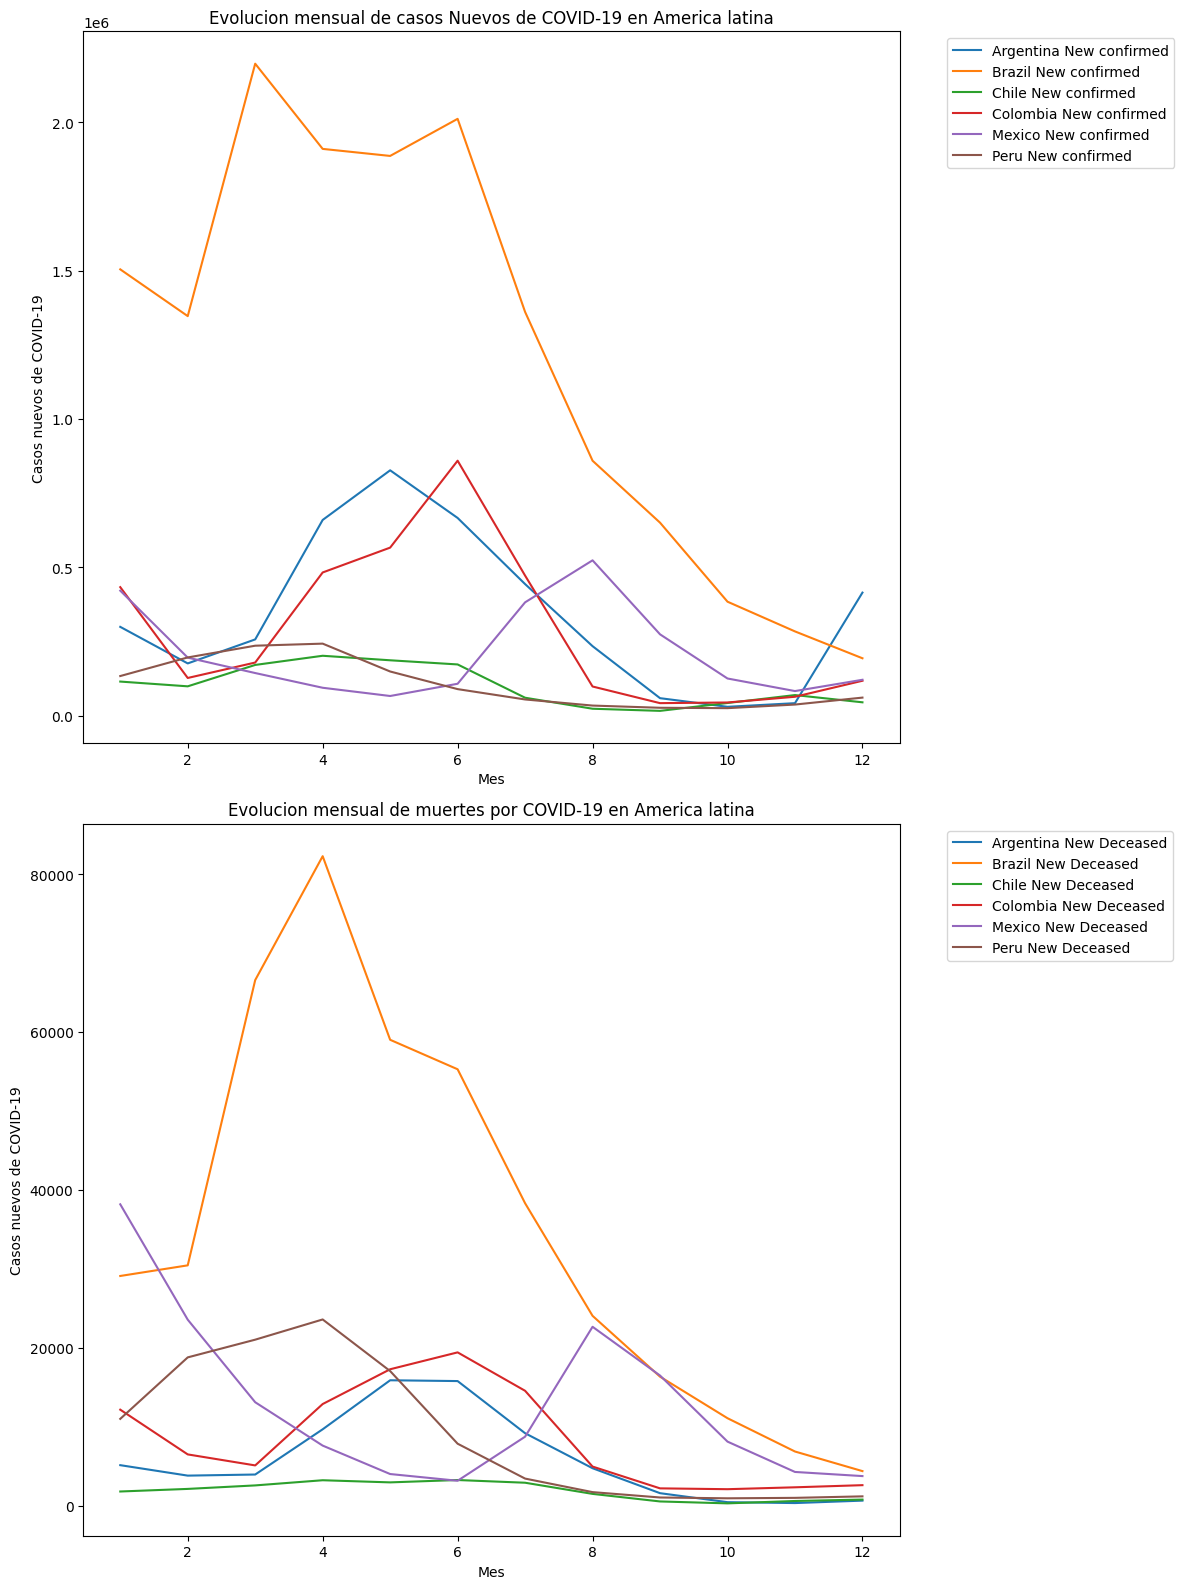

In [65]:
#evolutivo mensual del año
data_latinoamerica_paises_2021["month"]=data_latinoamerica_paises_2021.index.month

month_cases = data_latinoamerica_paises_2021.groupby(["country_name", "month"])[["new_confirmed", "new_deceased"]].sum().reset_index()
# se agrupa por pais y mes y calculo la sumatoria de las columnas de nuevos confirmado y nuevos fallecidos


fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in month_cases["country_name"].unique(): #Este bucle recorre cada país único en la columna "country_name" del DataFrame month_cases

    country_month_cases = month_cases[month_cases["country_name"]==country] #se crea un subconjunto de datos (country_month_cases) que contiene solo los datos de un país específico

    ax[0].plot(country_month_cases["month"], country_month_cases["new_confirmed"], label=f'{country} New confirmed')
    #se grafican los casos confirmados nuevos de cada país (new_confirmed) en función de la semana (week).
    ax[1].plot(country_month_cases["month"], country_month_cases["new_deceased"], label=f'{country} New Deceased')
    #se grafican las muertes nuevas (new_deceased) en función de la semana (week)


ax[0].set_xlabel("Mes")
ax[0].set_ylabel("Casos nuevos de COVID-19")
ax[0].set_title("Evolucion mensual de casos Nuevos de COVID-19 en America latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ax[1].set_xlabel("Mes")
ax[1].set_ylabel("Casos nuevos de COVID-19")
ax[1].set_title("Evolucion mensual de muertes por COVID-19 en America latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Se aprecia que los casos confirmados y los casos de muerte han ido disminuyendo al paso de los meses

Gráficas:

*Evolución de Casos Activos vs. Recuperados 
*Tasa de Crecimiento (%)
*Relación entre la Cobertura de Vacunación y la Reducción de Casos
*('País') Progreso de la vacunación por país
*Nuevos casos y temperatura promedio
*Impacto de la Urbanización en la Propagación del Covid-19
*Evolución Semanal de Casos Nuevos
*Evolución Anual de Casos Nuevos
*Distribución de la Población por Edad en Países
*Comparación de Estrategias de Vacunación en América Latina
*Evolución del Número de Muertes Diarias.
*Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
*Variación Mensual de Casos y Muertes
*Análisis Temporal de la Mortalidad/
*Comparación de la Situación Actual (Contexto de los datos)

In [66]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   
...                                           ...         ...   
2022-09-13                             83624934.0  29381884.0   
2022-09-14                             83624934.0  29381884.0   
2022-09-15                             83624934.0  29381884.0   
2022-09-16                             83624934.0  29381884.0   
2022-09-17                             83624934.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

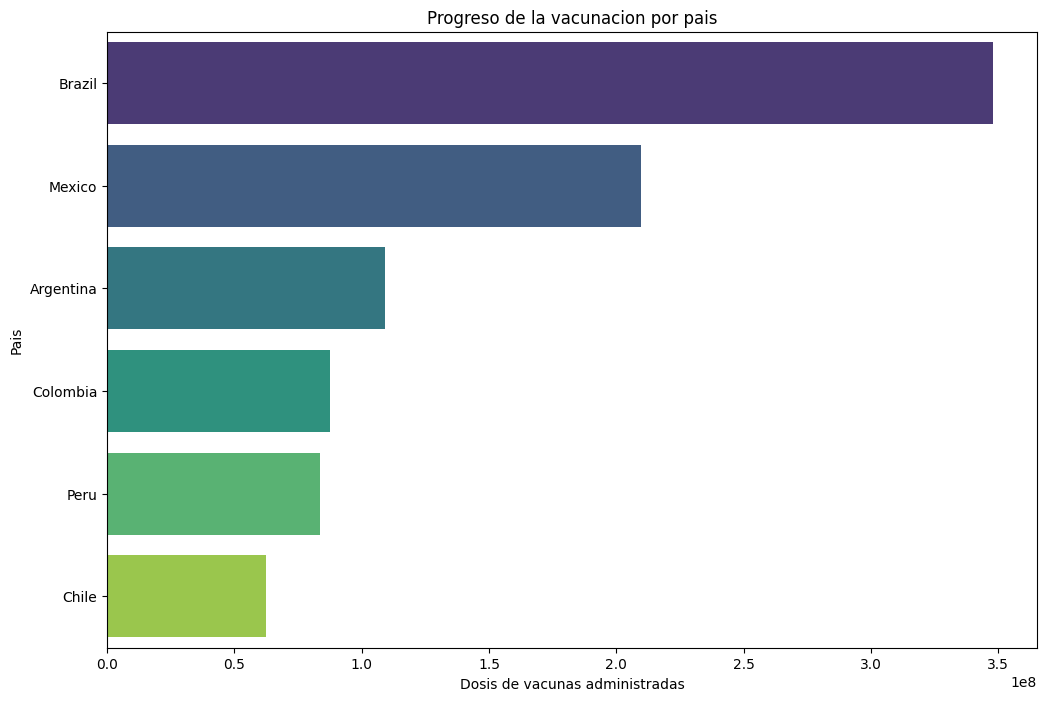

In [67]:
# Comparacion de estrategis de vacunacion
#utiliza las bibliotecas pandas, matplotlib y seaborn para crear un gráfico de barras que compara la cantidad total de dosis de vacunas administradas en cada país de América Latina
#agrupa los datos por país (columna "country_name"), selecciona la columna de dosis de vacunas administradas y toma el valor máximo de esta columna para cada país, ordena los datos de forma descendente
#Brasil con 35 millones de dosis
vaccination_data = data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)
vaccination_data

#l resultado, vaccination_data, es una serie de pandas donde el índice es el nombre de los países y los valores son las dosis máximas de vacunas administradas


plt.figure(figsize=(12,8)) #crea una figura de tamaño 12x8 pulgadas
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette="viridis")  #crea un gráfico de barras horizontal
#x=vaccination_data.values especifica las dosis administradas como valores en el eje x.
#y=vaccination_data.index coloca los nombres de los países en el eje y.
#hue=vaccination_data.index aplica una paleta de colores distinta a cada país.
#palette="viridis" usa la paleta de colores "viridis", que va de tonos oscuros a claros para resaltar los valores.

plt.xlabel("Dosis de vacunas administradas")
plt.ylabel("Pais")
plt.title("Progreso de la vacunacion por pais")

plt.show()

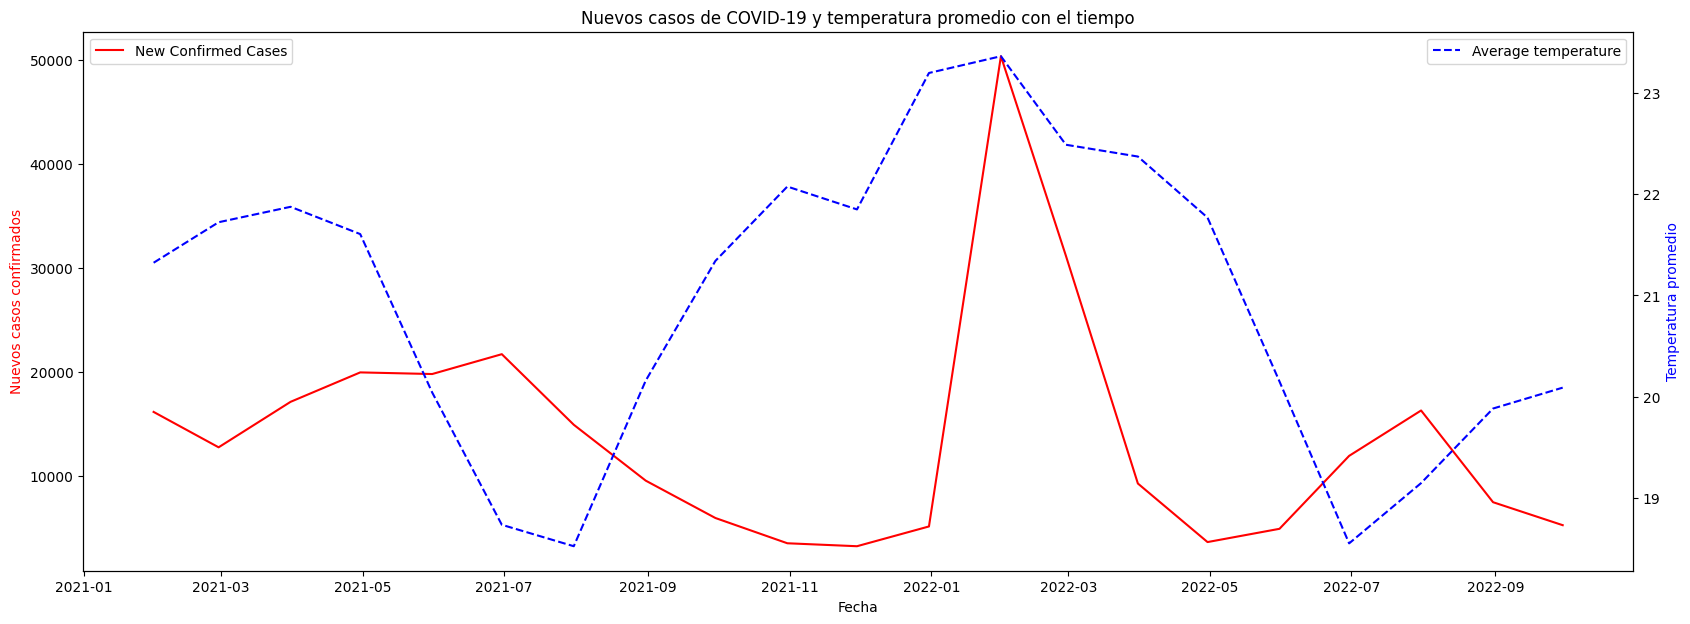

In [68]:
#Relacion entre la temperatura promedio y los nuevos casos
#Este código genera un gráfico en Python con dos ejes y dos líneas que muestran 
# la relación entre los nuevos casos confirmados de COVID-19 y la temperatura promedio a lo largo del tiempo en países de América Latina

plt.figure(figsize=(20, 7))
ax1= plt.gca() #obtiene el eje actual (en este caso, el eje izquierdo) y lo asigna a ax1
ax2 = ax1.twinx() #crea un segundo eje y lo asigna a ax2. Este segundo eje se superpone al primero, permitiendo visualizar dos conjuntos de datos con escalas diferentes en el mismo gráfico


ax1.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"], color="red", label="New Confirmed Cases")
#data_latinoamerica_paises.resample("ME").mean(numeric_only=True) toma el conjunto de datos data_latinoamerica_paises, lo reorganiza (resample("ME")) para agrupar los datos por mes,
#  y luego calcula la media de las columnas numéricas para cada mes. "ME" indica que se realiza el muestreo mensual al final de cada mes.
#.index obtiene las fechas en que se tomó la muestra mensual, que se usarán como valores en el eje x.
#data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"] obtiene el promedio mensual de los nuevos casos confirmados de COVID-19.
#color="red" y label="New Confirmed Cases" establecen el color de la línea y su etiqueta en la leyenda.
ax2.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["average_temperature_celsius"], color="blue", label="Average temperature", linestyle="--")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos casos confirmados", color="red")
ax2.set_ylabel("Temperatura promedio", color="blue")
plt.title("Nuevos casos de COVID-19 y temperatura promedio con el tiempo")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()





La temperatura promedio ha ido aunmentando y los casos confirmados han ido disminuyendo aunque hubo un pico a finales de febrero de 2021, pero disminuyo rapidamente.

# Analisis por densidad de poblacion

In [69]:
data_latinoamerica_paises[["population", "population_urban","cumulative_confirmed"]]


population  population_urban  cumulative_confirmed
date                                                          
2021-01-02  44938712.0        41339571.0          1.670634e+06
2021-01-03  44938712.0        41339571.0          1.675568e+06
2021-01-04  44938712.0        41339571.0          1.689521e+06
2021-01-05  44938712.0        41339571.0          1.703606e+06
2021-01-06  44938712.0        41339571.0          1.718102e+06
...                ...               ...                   ...
2022-09-13  29381884.0        25390339.0          4.127612e+06
2022-09-14  29381884.0        25390339.0          6.079579e+06
2022-09-15  29381884.0        25390339.0          6.079579e+06
2022-09-16  29381884.0        25390339.0          6.079579e+06
2022-09-17  29381884.0        25390339.0          6.079579e+06

[3744 rows x 3 columns]

In [70]:
# impacto de la urbanizacion en la propagacion del covid - 19
data_latinoamerica_paises["urban_population_percentage"] = data_latinoamerica_paises["population_urban"] / data_latinoamerica_paises["population"]
data_latinoamerica_paises["confirmed_population_percentage"] = data_latinoamerica_paises["cumulative_confirmed"] / data_latinoamerica_paises["population"]
urban_cases = data_latinoamerica_paises.groupby("country_name").last().sort_values(by="urban_population_percentage")
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO   12911.385484    134.379032   
Brazil                 BR           BR   12911.385484    134.379032   
Peru                   PE           PE   12911.385484    134.379032   
Argentina              AR           AR   12911.385484    134.379032   
Mexico                 MX           MX   12911.385484    134.379032   
Chile                  CL           CL   12911.385484    134.379032   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia              6.079579e+06        105716.119355   
Brazil                6.079579e+06        105716.119355   
Peru                  6.079579e+06        105716.119355   
Argentina             6.079579e+06        105716.119355   
Mexico                6.079579e+06        105716.119355   
Chile                 6.079579e+06        105716.119355   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                 87566541.0   50882884.0   
Brazil                                  347868481.0  212559409.0   
Peru                                     83624934.0   29381884.0   
Argentina                               109204825.0   44938712.0   
Mexico                                  209673612.0  110991953.0   
Chile                                    62204235.0   17574003.0   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia           24984564.0         25898320.0  ...           77.109   
Brazil            104435783.0        108123626.0  ...           75.672   
Peru               14450757.0         14931127.0  ...           76.516   
Argentina          19523766.0         20593330.0  ...           76.520   
Mexico             54855231.0         57481307.0  ...           74.992   
Chile               8972014.0          8601989.0  ...           80.042   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                        151.616                       77.999   
Brazil                          188.528                       91.421   
Peru                            146.370                       84.815   
Argentina                       147.086                       79.483   
Mexico                          184.379                       95.815   
Chile                           107.669                       59.035   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                          37.0                        15.8   
Brazil                            29.9                        16.6   
Peru                              63.9                        12.6   
Argentina                         26.6                        15.8   
Mexico                            36.7                        15.7   
Chile                             25.3                        12.4   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia                0.0             5441021.0    37   
Brazil                  0.0             1471374.0    37   
Peru                    0.0             5441021.0    37   
Argentina               0.0             6756284.0    37   
Mexico                  0.0             5441021.0    37   
Chile                   0.0             1471374.0    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                         0.802378                         0.

<function matplotlib.pyplot.show(close=None, block=None)>

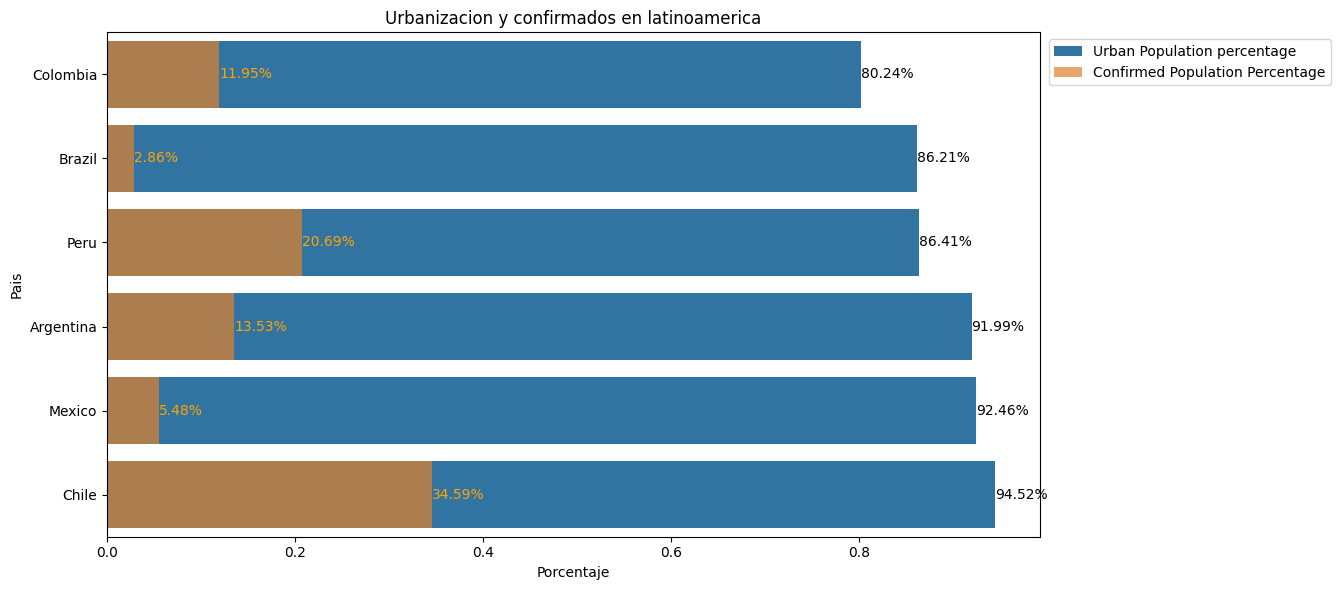

In [71]:
#impacto de la urbanizacion en la propagacion del covid - 19: Urbanizzacion en latinoamerica
plt.figure(figsize=(14,6))
ax = sns.barplot(x="urban_population_percentage", y=urban_cases.index, data=urban_cases, label="Urban Population percentage")
#generar estiquetas a las barras
for index, value in enumerate(urban_cases["urban_population_percentage"]):
    ax.text(value, index, f"{value*100:.2f}%", color="black", ha="left", va="center")

#segunda barra para urban_population_percentage, "superpuesta"
ax2 = sns.barplot(x="confirmed_population_percentage", y=urban_cases.index, data=urban_cases, alpha=0.7, label = "Confirmed Population Percentage")

#generar estiquetas a las barras para confirmed_population_percentage
for index, value in enumerate(urban_cases["confirmed_population_percentage"]):
    ax2.text(value, index, f"{value*100:.2f}%", color="orange", ha="left", va="center")

plt.xlabel("Porcentaje")
plt.ylabel("Pais")
plt.title("Urbanizacion y confirmados en latinoamerica")
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show




In [72]:
data_latinoamerica_paises["deceased_percentage"] = data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["population"]
data_latinoamerica_paises


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                    0.0  44938712.0   
2021-01-03                                    0.0  44938712.0   
2021-01-04                                    0.0  44938712.0   
2021-01-05                                    0.0  44938712.0   
2021-01-06                                    0.0  44938712.0   
...                                           ...         ...   
2022-09-13                             83624934.0  29381884.0   
2022-09-14                             83624934.0  29381884.0   
2022-09-15                             83624934.0  29381884.0   
2022-09-16                             83624934.0  29381884.0   
2022-09-17                             83624934.0  29381884.0   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02       19523766.0  ...                    147.086   
2021-01-03       19523766.0  ...                    147.086   
2021-01-04       19523766.0  ...                    147.086   
2021-01-05       19523766.0  ...                    147.086   
2021-01-06       19523766.0  ...                    147.086   
...                     ...  ...                        ...   
2022-09-13       14450757.0  ...                    146.370   
2022-09-14       14450757.0  ...                    146.370   
2022-09-15       14450757.0  ...                    146.370   
2022-09-16       14450757.0  ...                    146.370   
2022-09-17       14450757.0  ...                    146.370   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   
...                                 ...              

In [73]:
high_mortality_countries = data_latinoamerica_paises.groupby("country_name")["deceased_percentage"].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [74]:
age_groups = ["population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6718871.0             7045513.0             6430658.0   
2021-01-03             6718871.0             7045513.0             6430658.0   
2021-01-04             6718871.0             7045513.0             6430658.0   
2021-01-05             6718871.0             7045513.0             6430658.0   
2021-01-06             6718871.0             7045513.0             6430658.0   
...                          ...                   ...                   ...   
2022-09-13             5140624.0             5035905.0             4895056.0   
2022-09-14             5140624.0             5035905.0             4895056.0   
2022-09-15             5140624.0             5035905.0             4895056.0   
2022-09-16             5140624.0             5035905.0             4895056.0   
2022-09-17             5140624.0             5035905.0             4895056.0   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5777148.0             4507125.0             3911943.0   
2021-01-03             5777148.0             4507125.0             3911943.0   
2021-01-04             5777148.0             4507125.0             3911943.0   
2021-01-05             5777148.0             4507125.0             3911943.0   
2021-01-06             5777148.0             4507125.0             3911943.0   
...                          ...                   ...                   ...   
2022-09-13             4379777.0             3660378.0             2772568.0   
2022-09-14             4379777.0             3660378.0             2772568.0   
2022-09-15             4379777.0             3660378.0             2772568.0   
2022-09-16             4379777.0             3660378.0             2772568.0   
2022-09-17             4379777.0             3660378.0             2772568.0   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2914251.0             1817557.0   
2021-01-03             2914251.0             1817557.0   
2021-01-04             2914251.0             1817557.0   
2021-01-05             2914251.0             1817557.0   
2021-01-06             2914251.0             1817557.0   
...                          ...                   ...   
2022-09-13             1846407.0             1078066.0   
2022-09-14             1846407.0             1078066.0   
2022-09-15             1846407.0             1078066.0   
2022-09-16             1846407.0             1078066.0   
2022-09-17             1846407.0             1078066.0   

            population_age_80_and_older  
date                                     
2021-01-02                     994030.0  
2021-01-03                     994030.0  
2021-01-04                     994030.0  
2021-01-05                     994030.0  
2021-01-06                     994030.0  
...                                 ...  
2022-09-13                     573103.0  
2022-09-14                     573103.0  
2022-09-15                     573103.0  
2022-09-16                     573103.0  
2022-09-17                     573103.0  

[3744 rows x 9 columns]

In [75]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises["country_name"].isin(high_mortality_countries)].groupby("country_name")[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Peru                             573103.0

In [76]:
age_distribution_arg = age_distribution[age_distribution.index=="Argentina"]
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0

In [77]:
age_distribution_arg.loc["Argentina"]

population_age_00_09           6718871.0
population_age_10_19           7045513.0
population_age_20_29           6430658.0
population_age_30_39           5777148.0
population_age_40_49           4507125.0
population_age_50_59           3911943.0
population_age_60_69           2914251.0
population_age_70_79           1817557.0
population_age_80_and_older     994030.0
Name: Argentina, dtype: float64

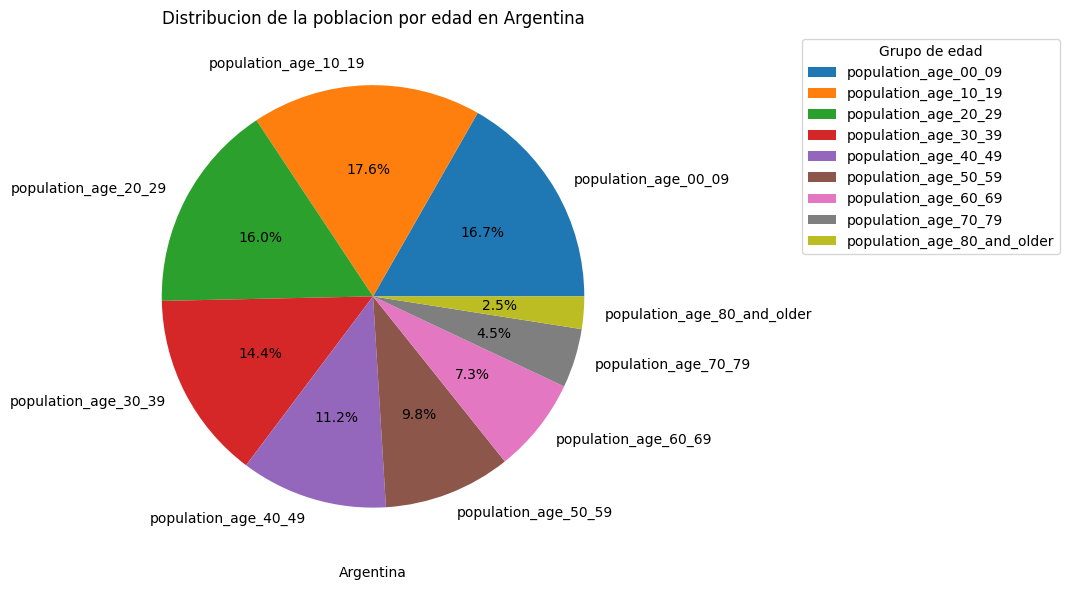

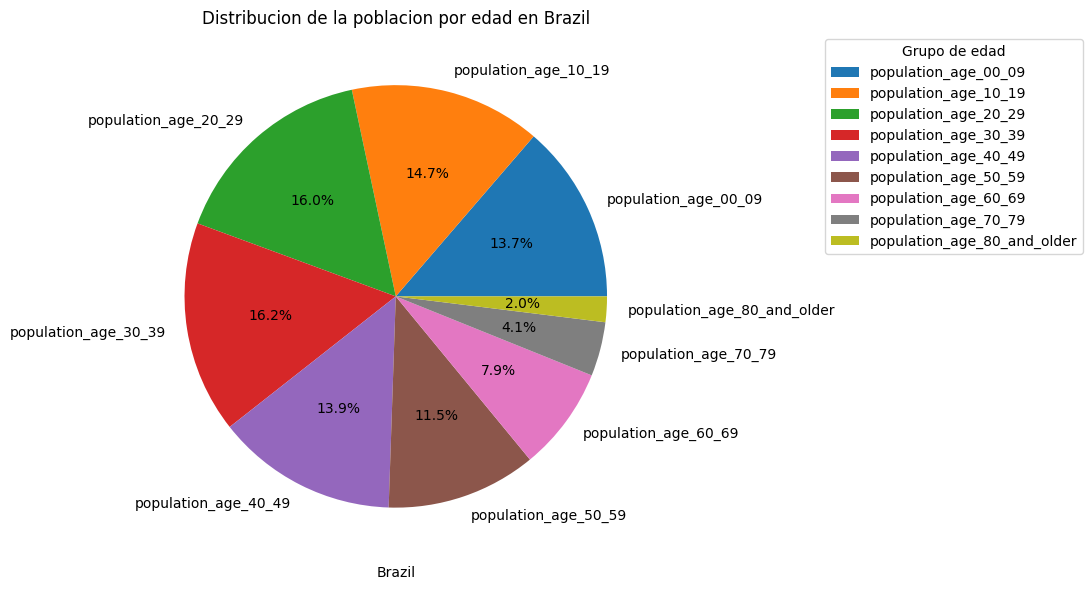

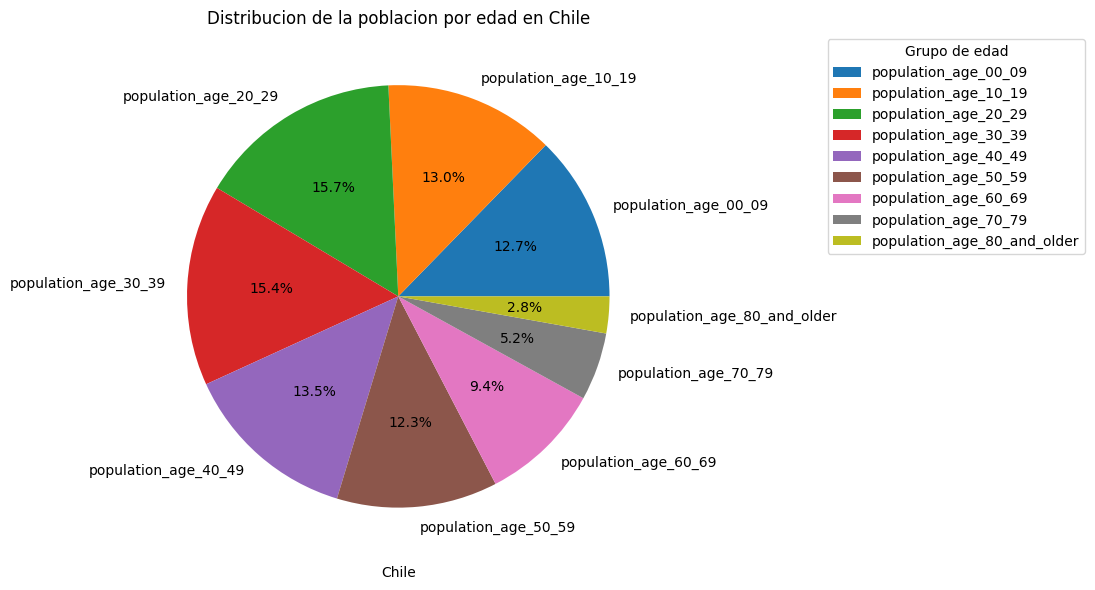

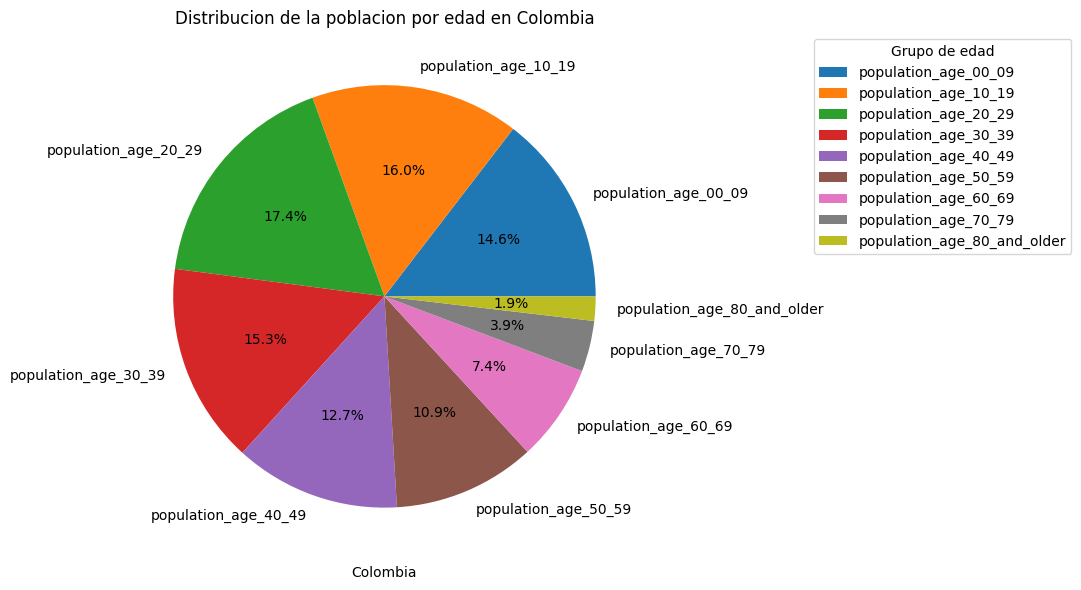

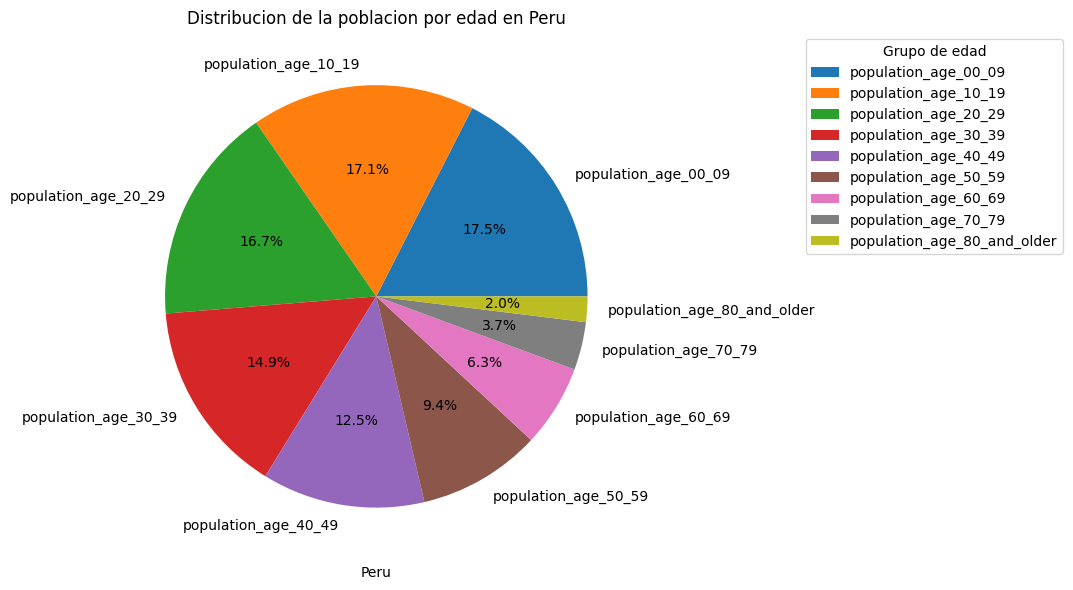

In [78]:
# Visualizar la densidad de población por grupos de edad para cada país utilizando gráficos de pastel.
# 1. Obtener la lista única de países a partir de los índices de 'age_distribution'.
paises =age_distribution.index.unique()

# 2. Iterar sobre cada país en la lista de países
for pais in paises:
    # Crear una nueva figura con un tamaño específico.
    plt.figure(figsize=(12,6))
    # Generar un gráfico de pastel:
    # - 'age_distribution.loc[pais].values': Valores correspondientes a los grupos de edad para el país actual.
    # - 'labels=age_distribution.loc[pais].index': Etiquetas para los grupos de edad.
    # - 'autopct="%1.1f%%"': Mostrar el porcentaje con una precisión de una décima.
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct="%1.1f%%"
    )
    # Agregar etiquetas y título:
    # - Etiqueta debajo del gráfico que indica el nombre del país.
    plt.xlabel(f"{pais}")
    plt.title(f"Distribucion de la poblacion por edad en {pais}")
    
    
    # Agregar una leyenda:
    # - 'bbox_to_anchor=(1.3,1)': Posicionar la leyenda fuera del gráfico, a la derecha.
    # - 'loc="upper left"': Alinear la leyenda en la esquina superior izquierda.
    # - 'title="Grupo de edad"': Título para la leyenda.
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper left", title="Grupo de edad")
    plt.tight_layout()
    plt.show()


El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

In [79]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina    109204825.0
Brazil       347868481.0
Chile         62204235.0
Colombia      87566541.0
Mexico       209673612.0
Peru          83624934.0
Name: cumulative_vaccine_doses_administered, dtype: float64

In [80]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina     44938712.0
Brazil       212559409.0
Chile         17574003.0
Colombia      50882884.0
Mexico       110991953.0
Peru          29381884.0
Name: population, dtype: float64

In [81]:
#Esta expresión calcula la proporción de la dosis máxima acumulada de vacunas administradas respecto a la población media de cada país en el conjunto de datos data_latinoamerica_paises.
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    2.430084
Brazil       1.636571
Chile        3.539560
Colombia     1.720943
Mexico       1.889088
Peru         2.846139
dtype: float64

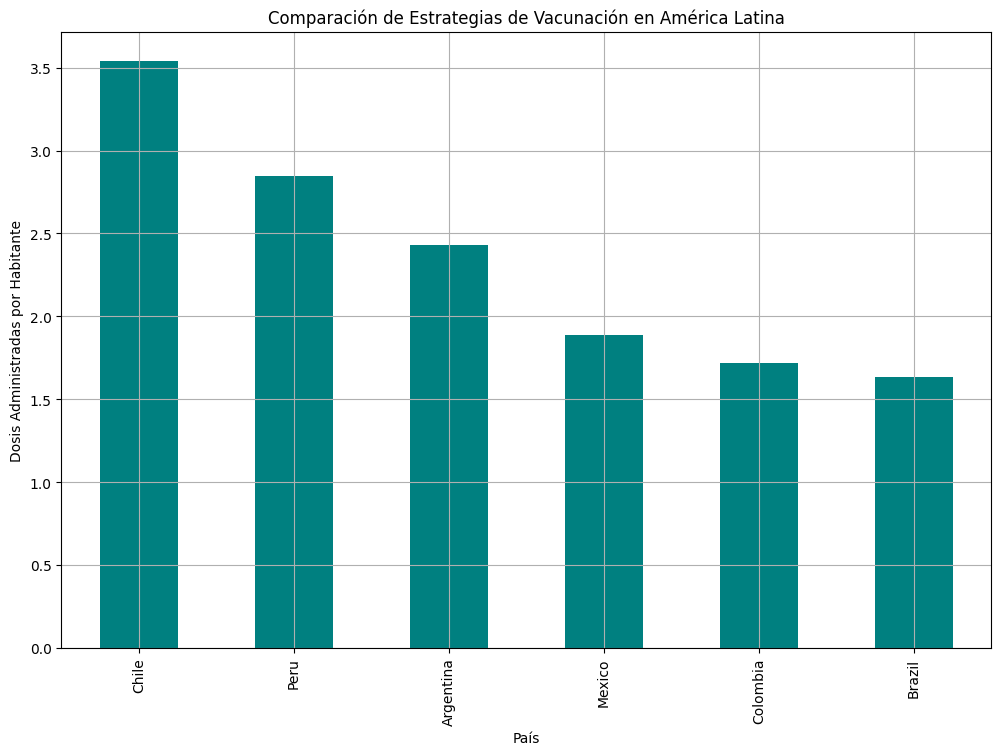

In [82]:
# Esta expresión crea un gráfico de barras para visualizar la estrategia de vacunación en distintos países de América Latina, 
# mostrándolos en función de la proporción máxima de dosis de vacunas administradas en relación con la población media.
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)
# Genera un gráfico de barras de 12 pulgadas de ancho por 8 de alto, con barras de color teal y una cuadrícula en el fondo para facilitar la lectura. Cada barra representa un país, 
# y su altura indica la proporción máxima de dosis administradas en relación con su población promedio.

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

In [83]:
#Esta expresión selecciona los tres países con el porcentaje más alto de fallecimientos 
# registrados en el conjunto de datos data_latinoamerica_paises, en función de la columna deceased_percentage.
#.nlargest(3): Toma los tres países con los valores más altos de deceased_percentage máximo.
#.index: Extrae los nombres de los países (es decir, los índices de los tres valores más altos) en lugar de los valores mismos.
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

#La salida muestra los nombres de los tres países con el porcentaje más alto de fallecimientos registrados: 'Peru', 'Chile' y 'Brazil'. 
# Esto significa que, entre todos los países en el conjunto de datos data_latinoamerica_paises, 
# estos tres presentan los valores más altos de deceased_percentage máximo.

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [84]:
# Esta expresión selecciona los tres países con el porcentaje más bajo de fallecimientos registrados 
# en el conjunto de datos data_latinoamerica_paises, en función de la columna deceased_percentage.
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
#  Dentro de cada grupo (es decir, para cada país), selecciona la columna deceased_percentage (porcentaje de fallecimientos) y obtiene el valor máximo para cada país. 
# Este valor representa el porcentaje de fallecimientos más alto registrado para cada país.
#.nsmallest(3): Toma los tres países con los valores más bajos en el deceased_percentage máximo, 
# es decir, los países con el menor porcentaje de fallecimientos registrado.

# muestra los nombres de los tres países con el porcentaje de fallecimientos más bajo registrado en el conjunto de datos: 'Mexico', 'Argentina', y 'Colombia'. 
# Esto indica que, entre los países en data_latinoamerica_paises, estos tres tienen los valores más bajos en el porcentaje máximo de fallecimientos (deceased_percentage).

bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

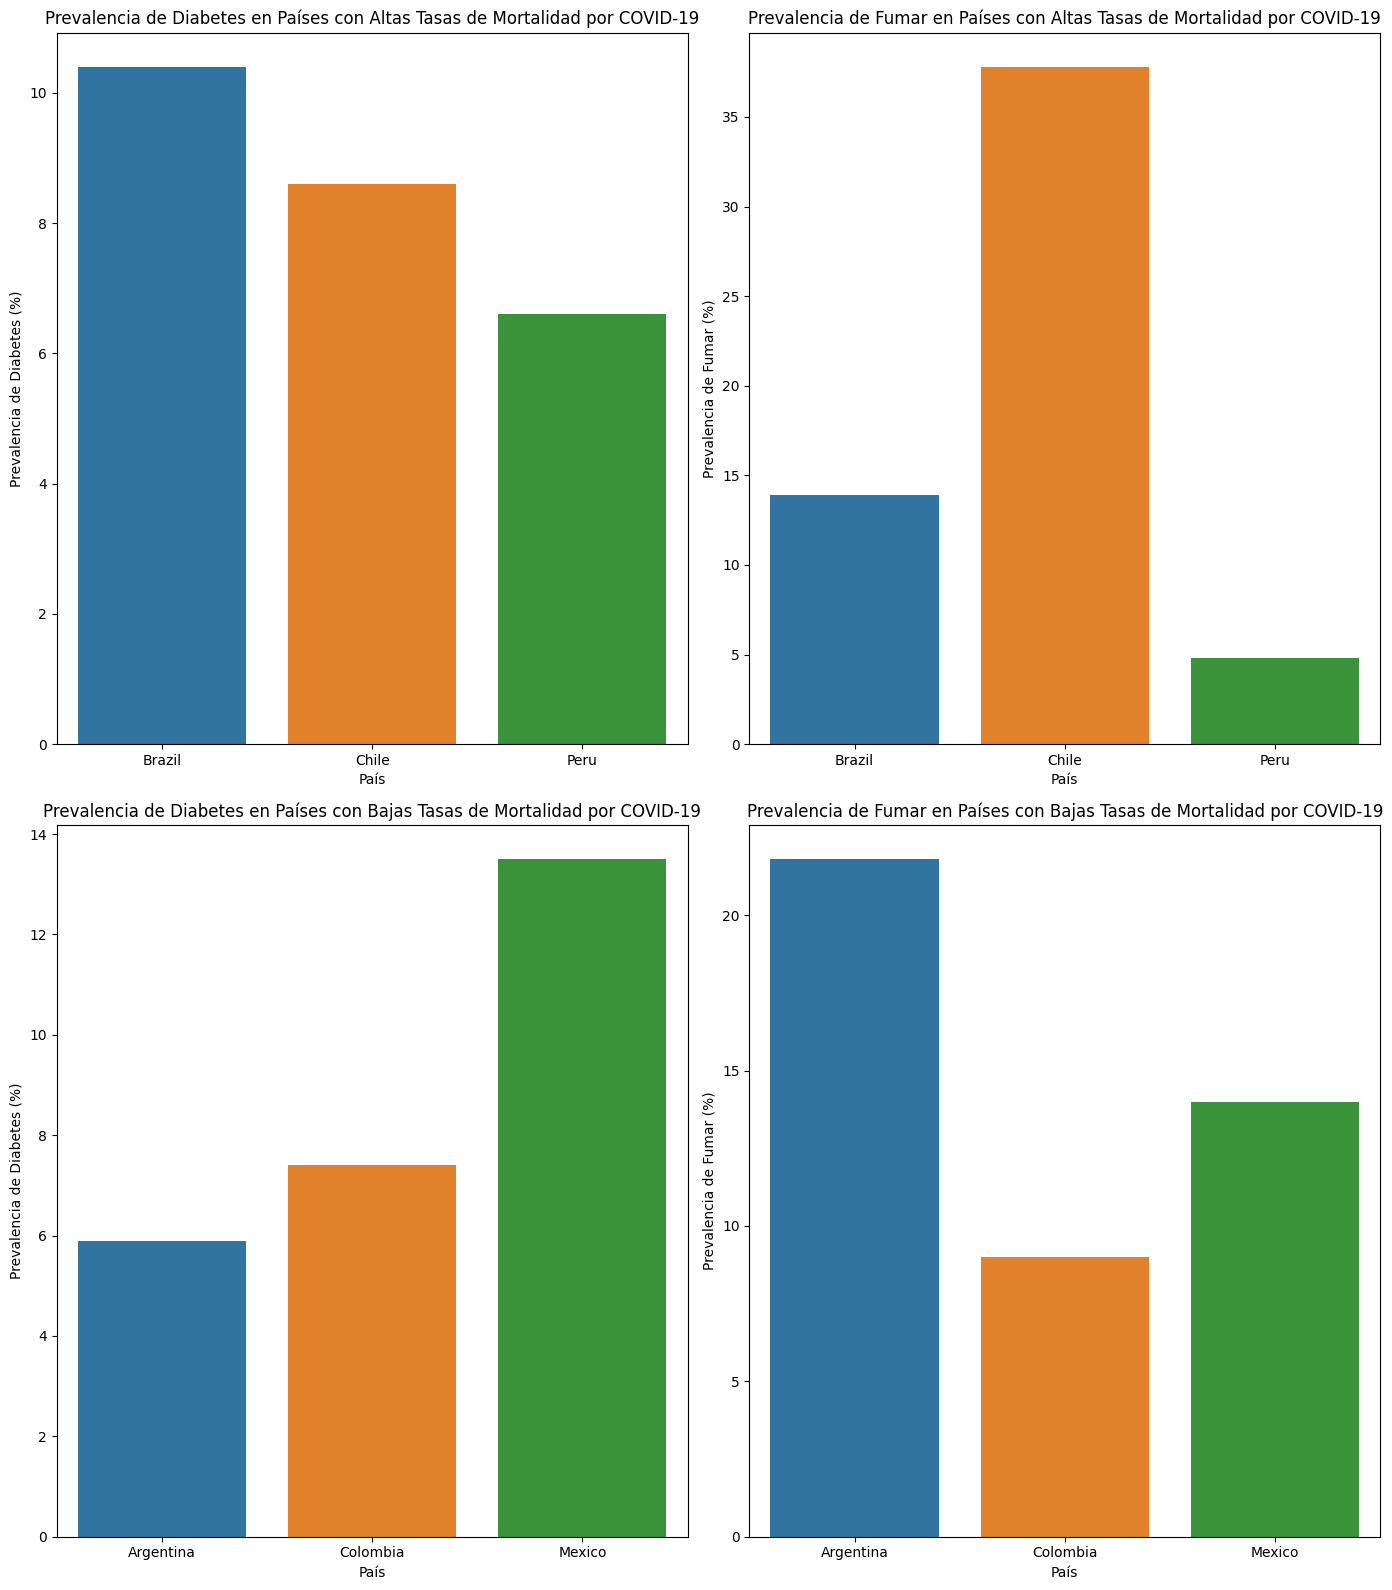

In [85]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

In [86]:
###### Fatalidad por pais ########
#Esta expresión calcula un índice de fatalidad en términos del porcentaje de fallecimientos entre los casos confirmados de COVID-19 para cada país en el conjunto de datos data_latinoamerica_paises. 
# Luego, organiza estos índices de fatalidad de menor a mayor para compararlos entre los países.


data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values().round(2)
#['case_fatality_rate'].last(): Dentro de cada grupo, selecciona el último valor disponible de case_fatality_rate para cada país. 
# Esto es útil si los datos están ordenados cronológicamente, pues permite obtener la tasa de letalidad más reciente de cada país.
# sort_values(): Ordena las tasas de letalidad de menor a mayor, para que los países con los índices de fatalidad más bajos aparezcan primero. 
fatality_rates

country_name
Argentina    0.02
Brazil       0.02
Chile        0.02
Colombia     0.02
Mexico       0.02
Peru         0.02
Name: case_fatality_rate, dtype: float64

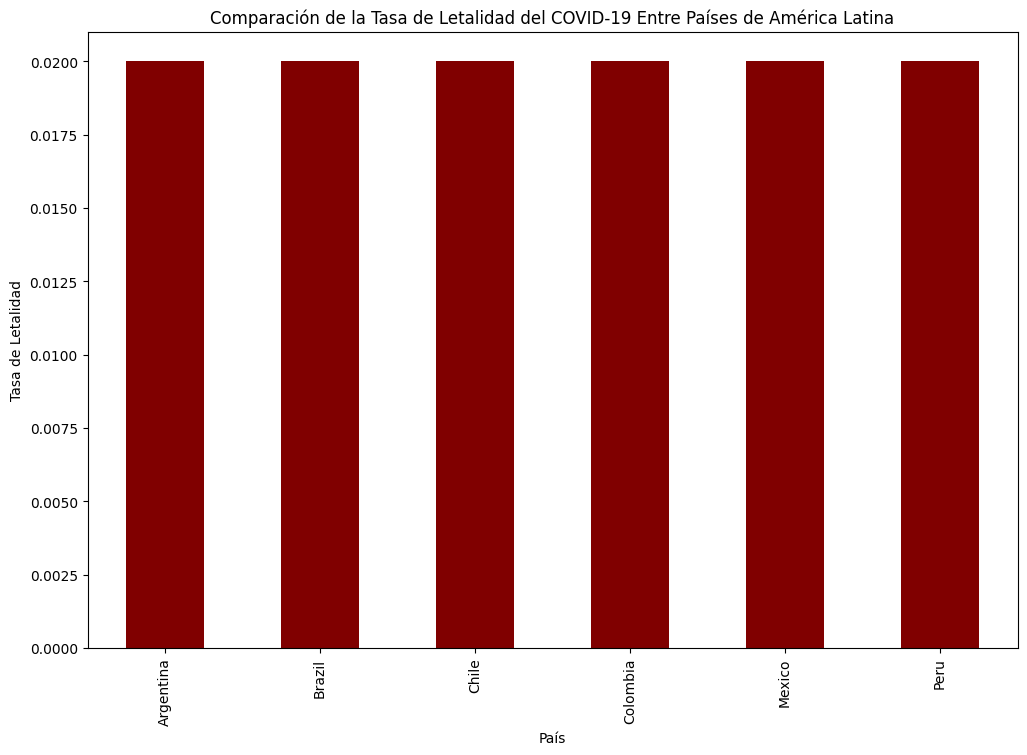

In [87]:
#graficamos el porcentaje de fatalidad
plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muertes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

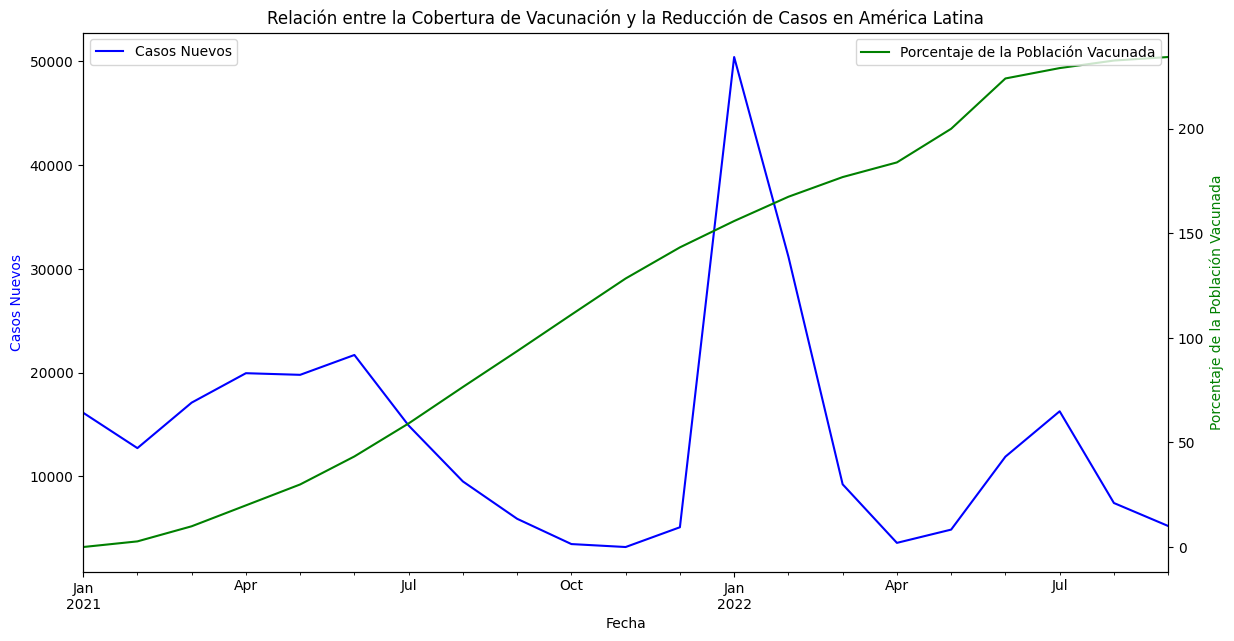

In [88]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

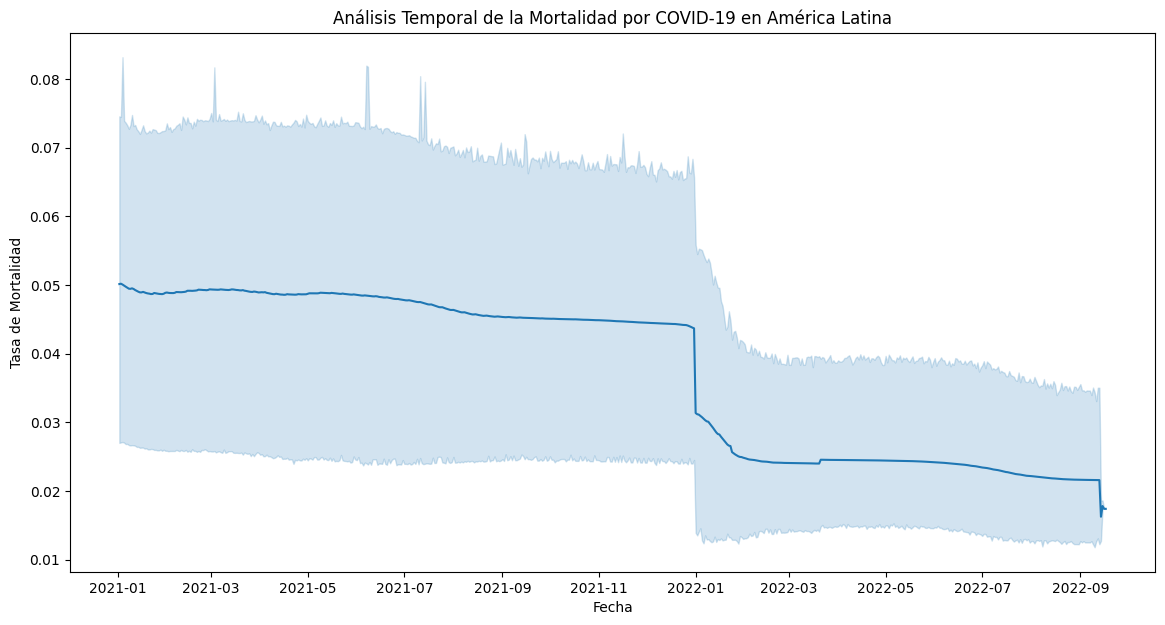

In [89]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

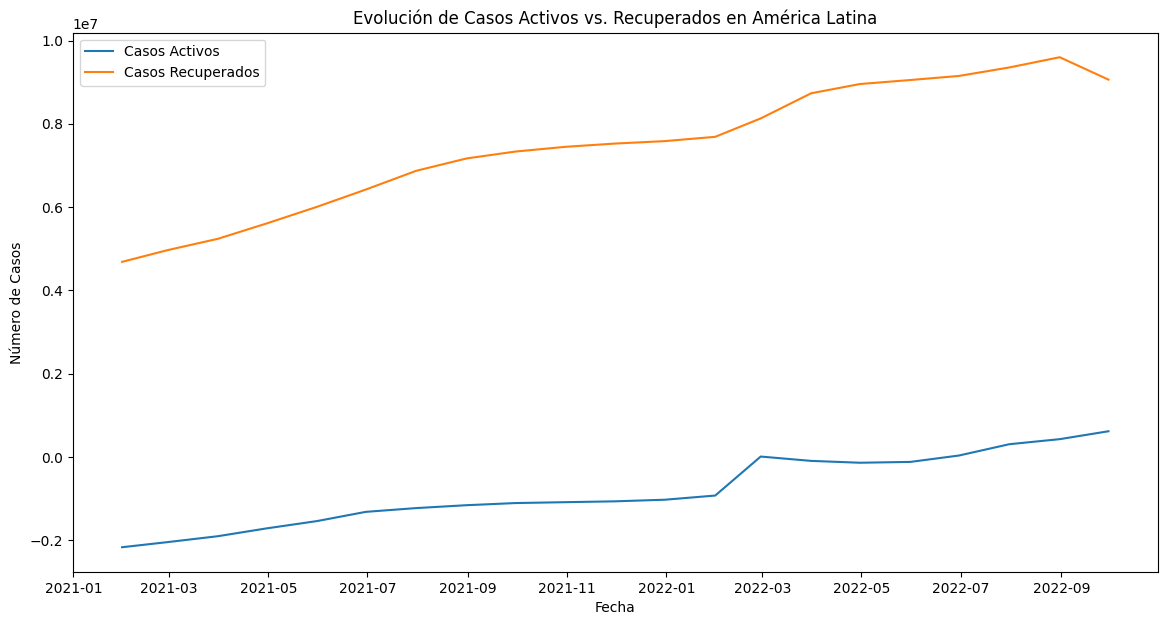

In [90]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
#Este código genera un gráfico de líneas para mostrar la evolución de los casos activos y recuperados de COVID-19 en América Latina a lo largo del tiempo, 
# utilizando el conjunto de datos data_latinoamerica_paises. Cada línea representa una serie temporal, con datos promediados mensualmente
# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

Este gráfico de líneas muestra cómo han evolucionado los casos activos y recuperados en América Latina, suavizados a promedios mensuales. Facilita la comparación de tendencias entre los casos activos y los recuperados a lo largo del tiempo, ayudando a visualizar el progreso en la recuperación.
La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 


In [91]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases").round(2)
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina        -782421.4             6756284.0            105716.12
Colombia          532841.6             5441021.0            105716.12
Peru              532841.6             5441021.0            105716.12
Mexico            532841.6             5441021.0            105716.12
Chile            4502488.6             1471374.0            105716.12
Brazil           4502488.6             1471374.0            105716.12

In [92]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases").round(2)
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Peru              532841.6             5441021.0            216173.00
Mexico            532841.6             5441021.0            304025.00
Colombia          721588.0             5441021.0            155770.00
Argentina        2811649.0             6756284.0            129830.00
Chile            4502488.6             1471374.0            105716.12
Brazil           4502488.6            33706231.0            685203.00

In [93]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina -7.824214e+05             6756284.0   
2022-09-17       Brazil  4.502489e+06             1471374.0   
2022-09-17        Chile  4.502489e+06             1471374.0   
2022-09-17     Colombia  5.328416e+05             5441021.0   
2022-09-17       Mexico  5.328416e+05             5441021.0   
2022-09-17         Peru  5.328416e+05             5441021.0   

            cumulative_deceased  
date                             
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355

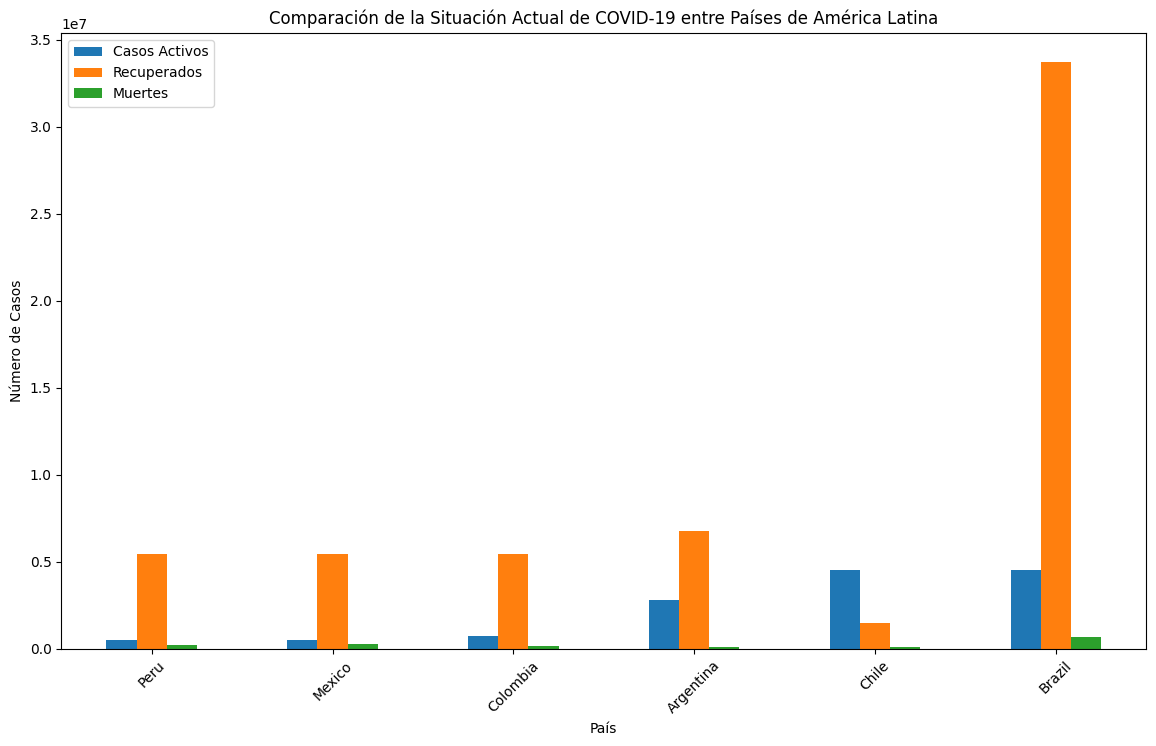

In [94]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por algún mótivo el dataset no está persistiendo los datos acumulados de recuperados. Lo cual no nos permite ver la cantidad de recuperados actuales de cada pais

### EXTRA CREDIT

Para tener un mejor contexto graficamos la cantidad de vacunas administradas,los casos confirmados, muertes y recuperados.

In [95]:
! pip install folium

In [96]:
! pip freeze > ../requirements.txt

In [97]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

No se ve muy detallado en las anteriores gráficas, por lo que vamos a realizar un análisis más detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada país pero con gráficos mas básicos manteniendo los mapas.

In [98]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
! pip install geopandas
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.2 MB 7.6 MB/s eta 0:00:02
   -------------- ------------------------- 6.0/16.2 MB 15.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 19.9 MB/s eta 0:00:01
   ------------------------------------ --- 14.7/16.2 MB 19.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 17.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ------------------------------ --------- 4.7/6.2 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 24.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.9 MB/s eta 0:00:00
featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAM

In [99]:
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [100]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [101]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6 entries, 9 to 32
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 7.4+ KB


In [102]:
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [103]:
# Mergeo con mi dataset agrupado
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...         9.697763e+06  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...         6.079579e+06  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...         6.079579e+06  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...         3.456883e+07  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...         6.079579e+06  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...         6.304317e+06  

[6 rows x 170 columns]

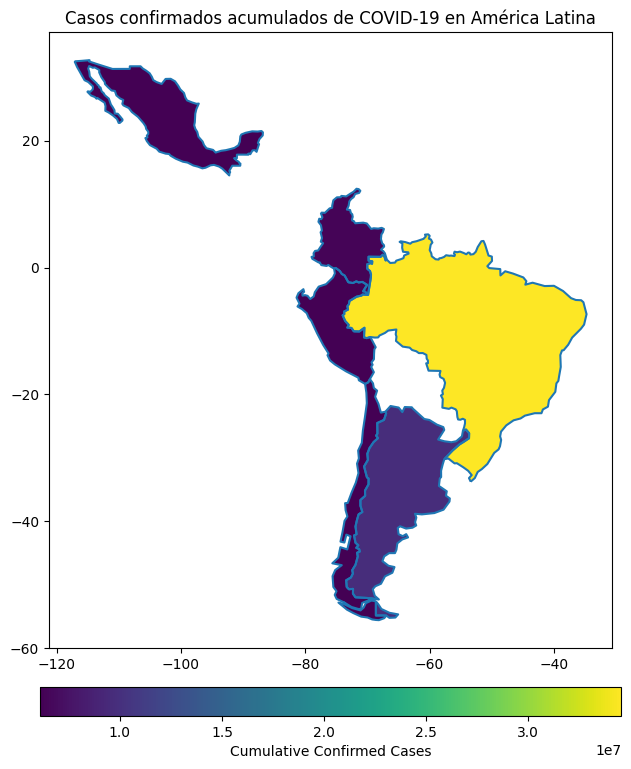

In [104]:
#Este código genera un mapa geoespacial que muestra los casos confirmados acumulados de COVID-19 en América Latina, 
# utilizando colores para representar la cantidad de casos en cada país

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
#world.boundary.plot(ax=ax): Usa el conjunto de datos world para trazar únicamente los contornos de los países en el eje ax. 
# Esto ayuda a definir los bordes de los países sin rellenar colores, proporcionando una referencia para los límites geográficos.
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

Este mapa temático muestra América Latina, con cada país coloreado según sus casos confirmados acumulados de COVID-19. Los colores y la leyenda permiten identificar fácilmente los países con mayor y menor número de casos, facilitando el análisis geográfico de la propagación del virus en la región.

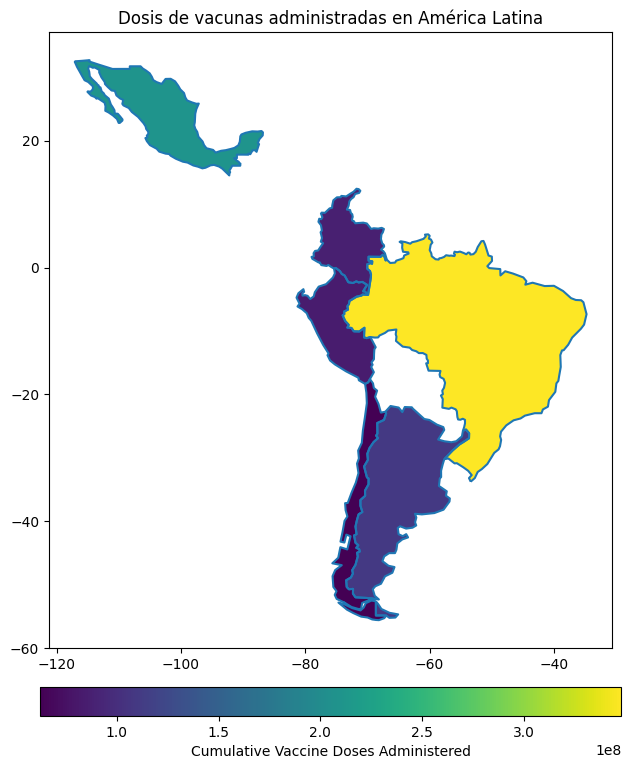

In [105]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

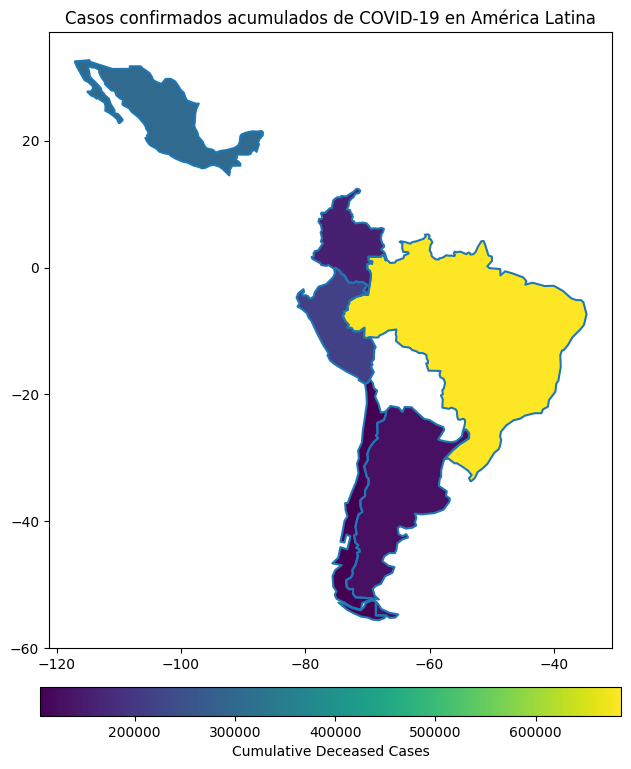

In [106]:
# mapa para ver la distribución muertes en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

In [107]:
data_latam_location_fecha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64